Found 30 spec files.

Exploring: spec_00a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


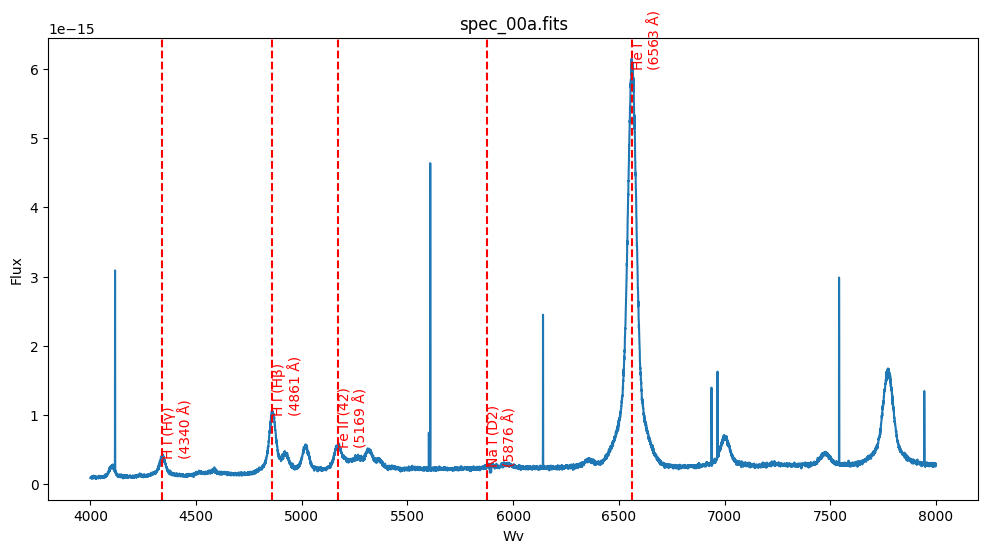


Exploring: spec_00b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


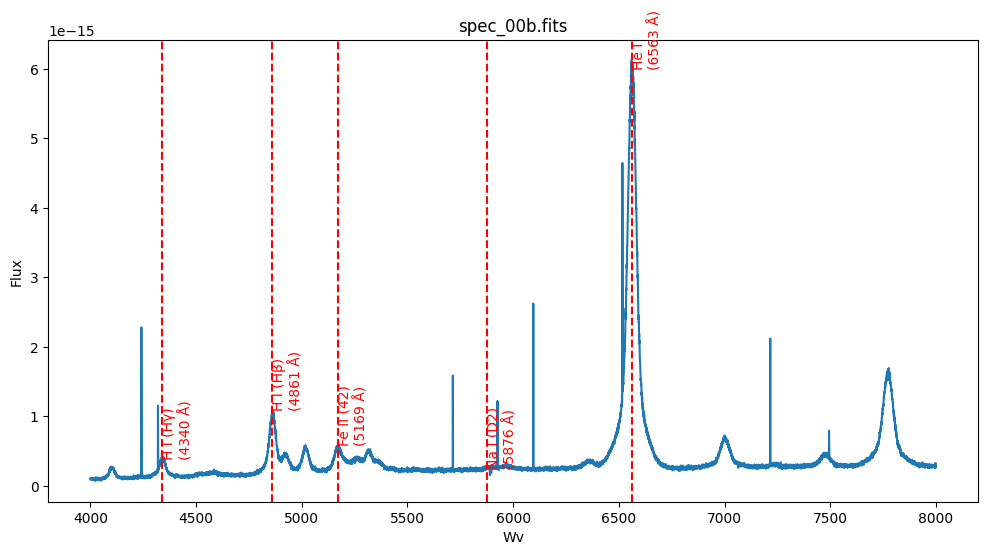


Exploring: spec_00c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


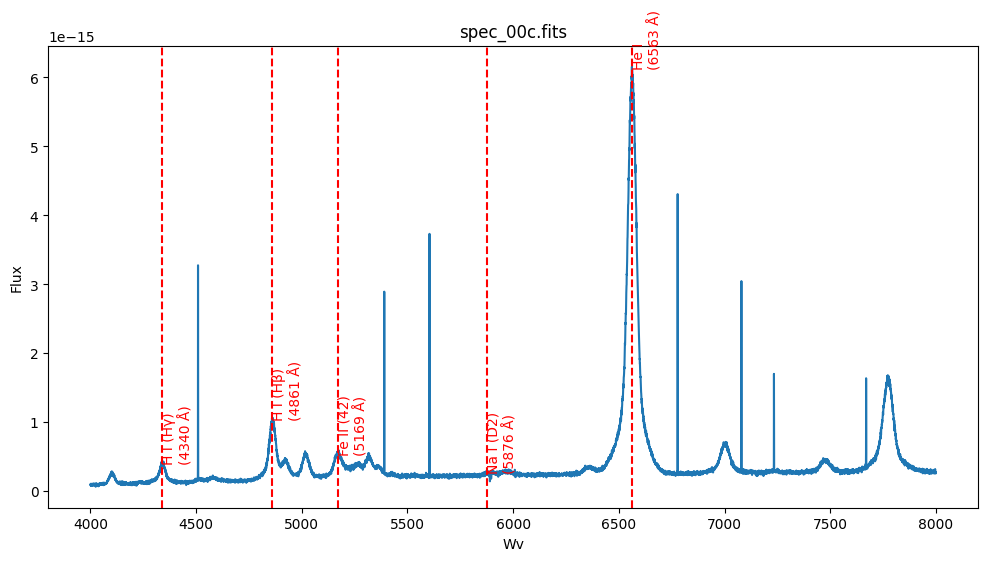


Exploring: spec_01a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


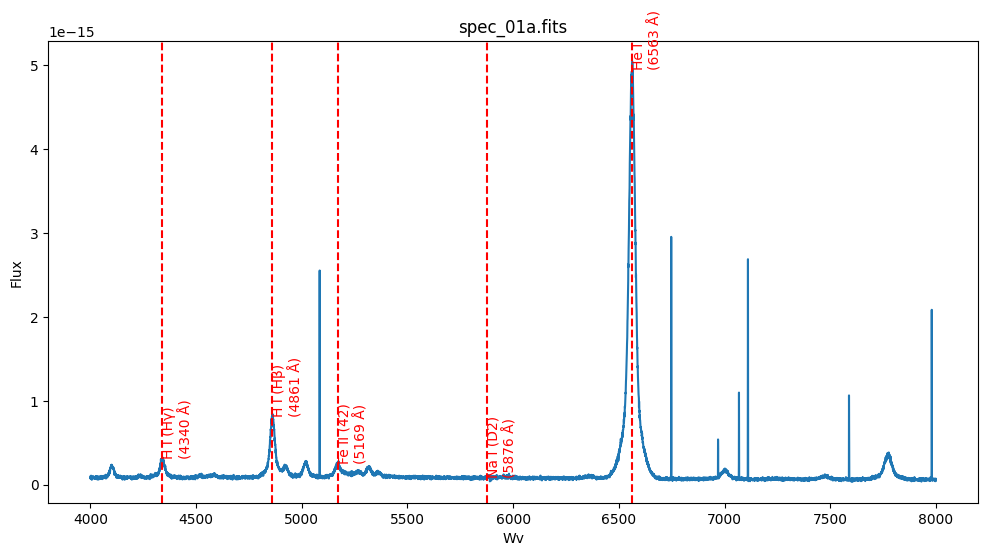


Exploring: spec_01b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


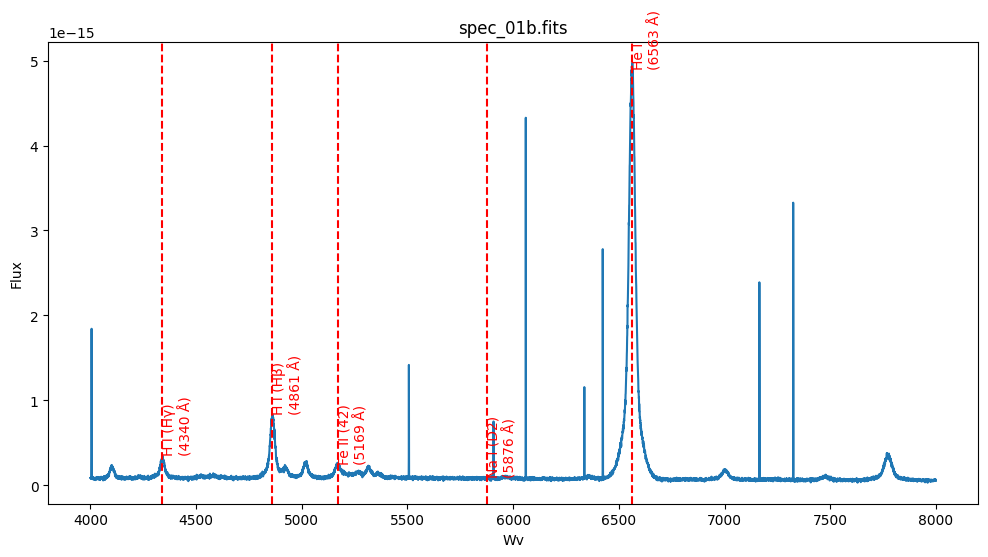


Exploring: spec_01c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


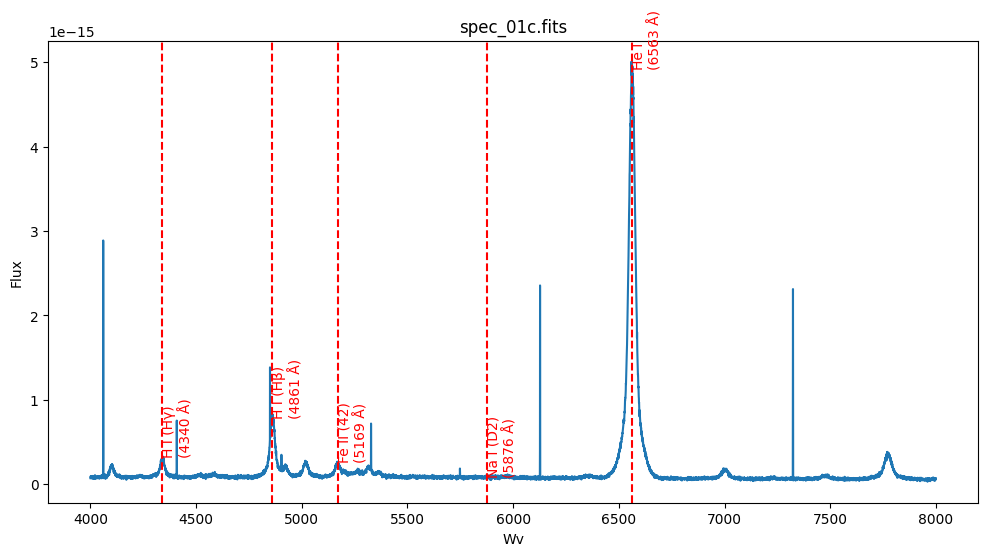


Exploring: spec_02a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


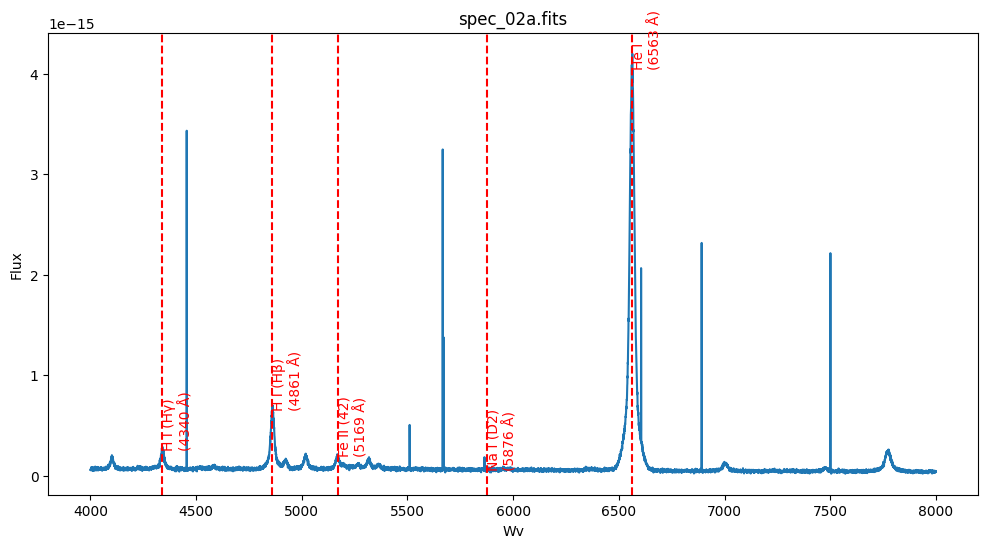


Exploring: spec_02b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


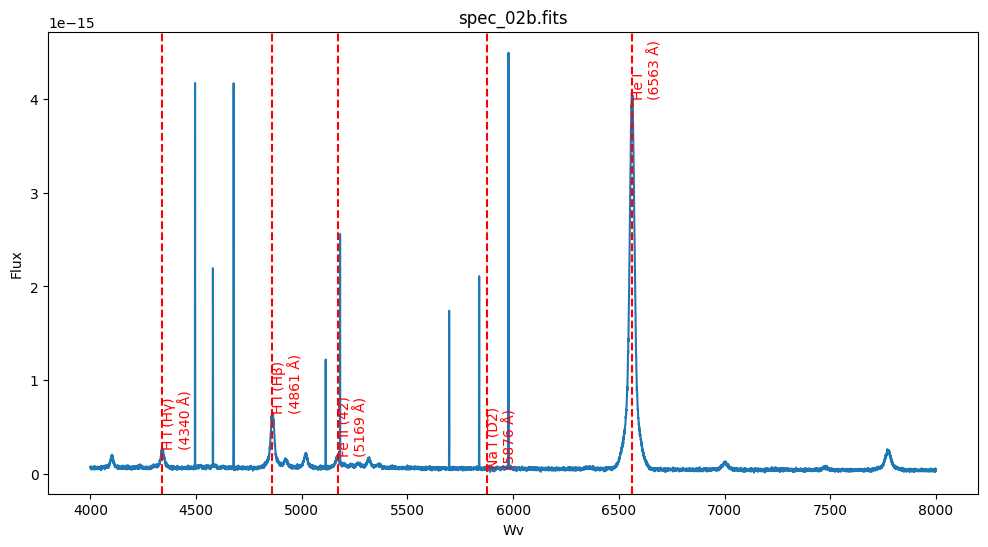


Exploring: spec_02c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


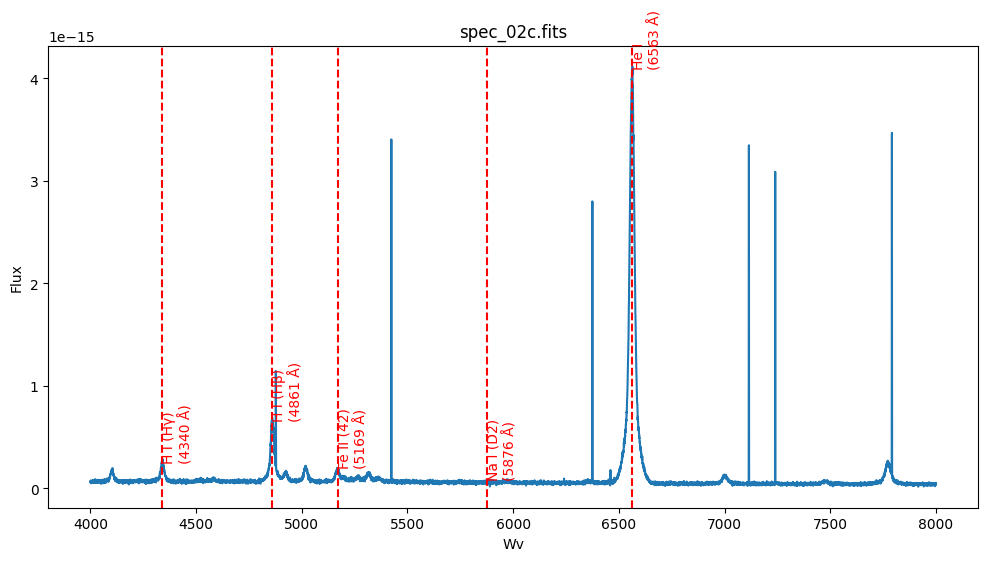


Exploring: spec_03a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


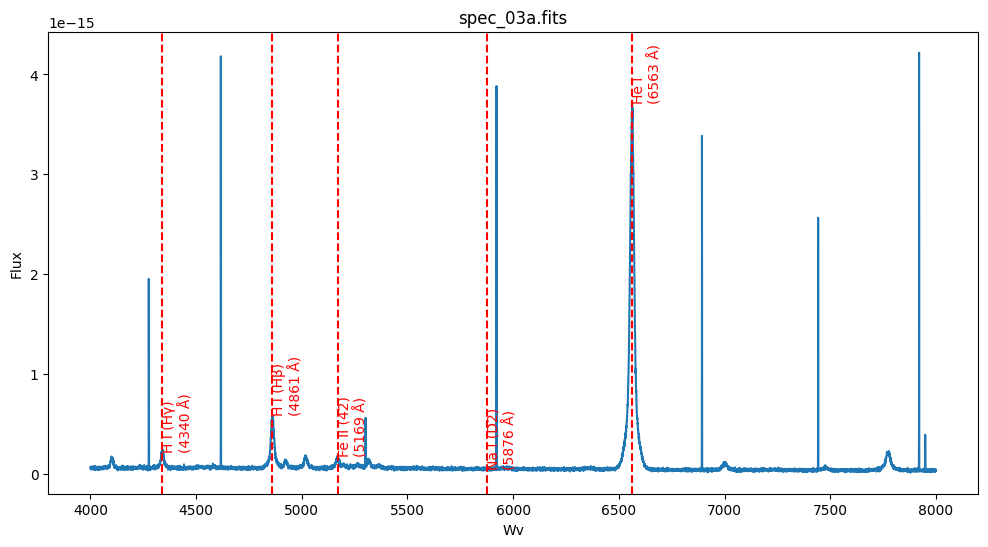


Exploring: spec_03b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


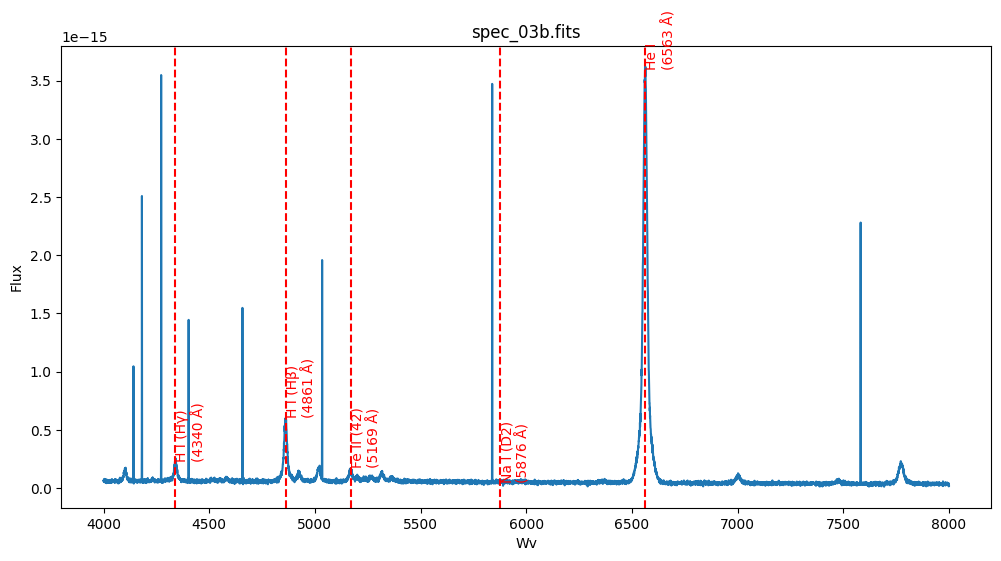


Exploring: spec_03c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


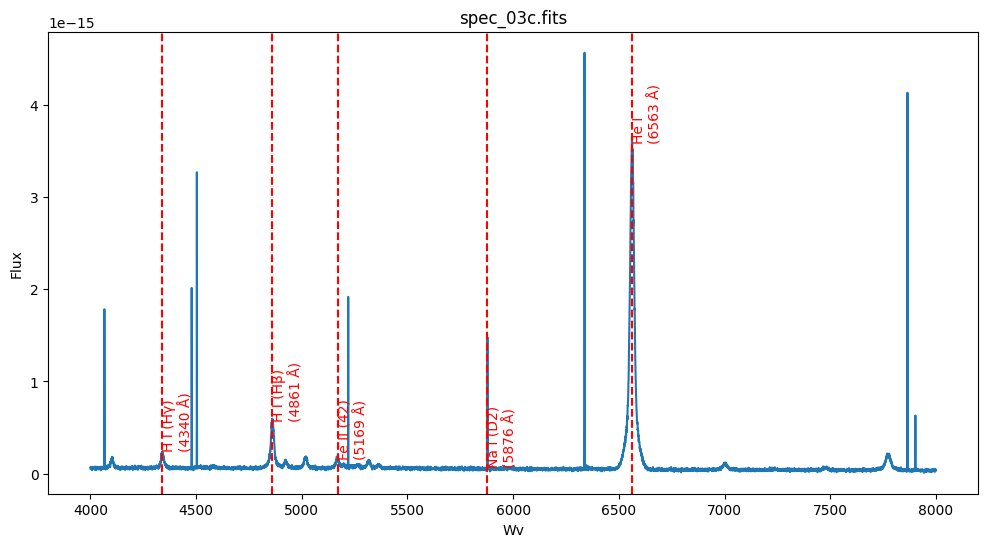


Exploring: spec_04a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


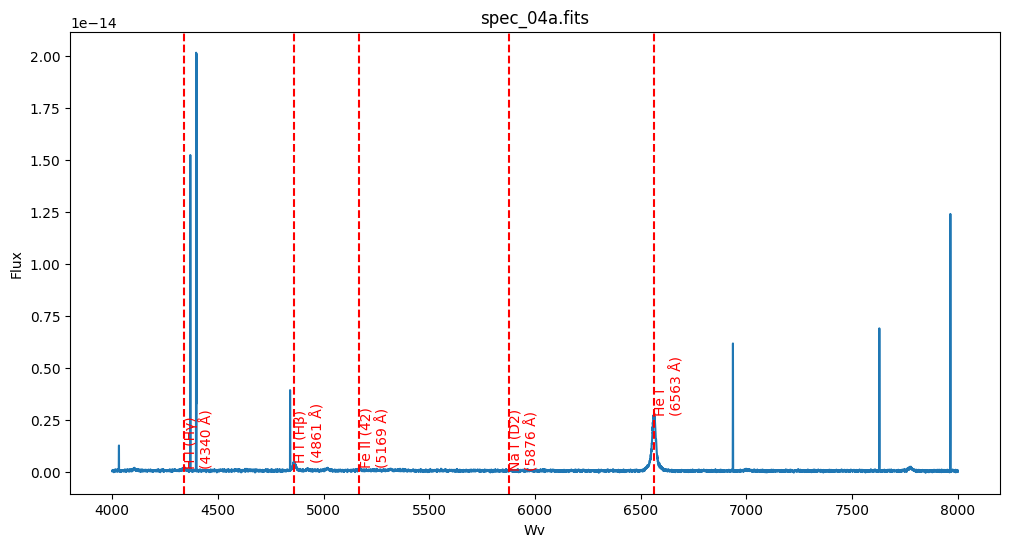


Exploring: spec_04b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


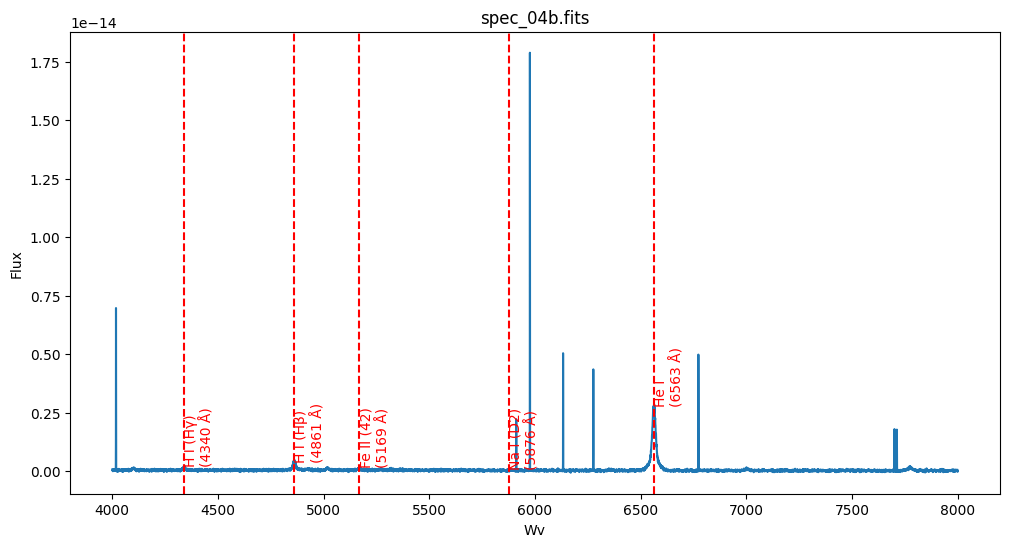


Exploring: spec_04c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


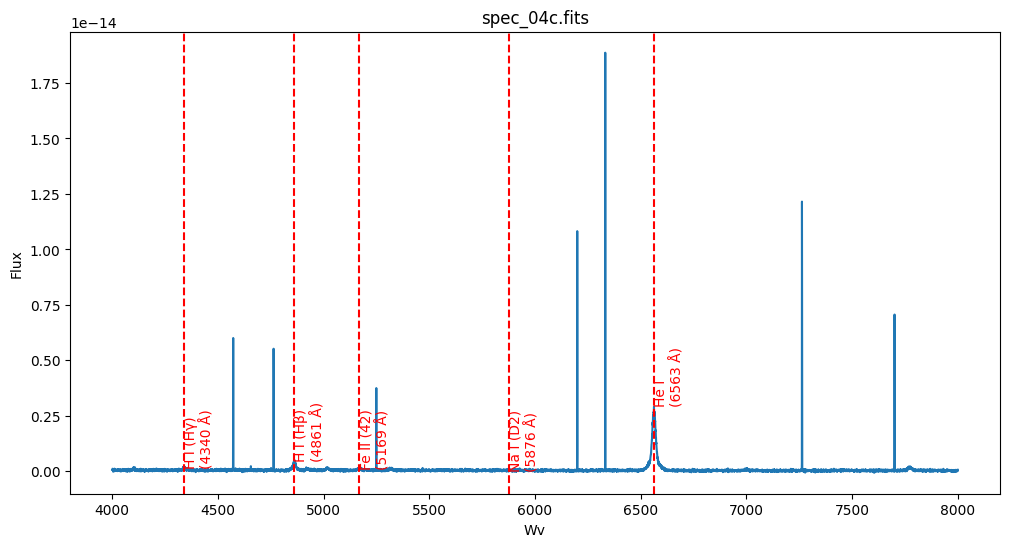


Exploring: spec_05a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


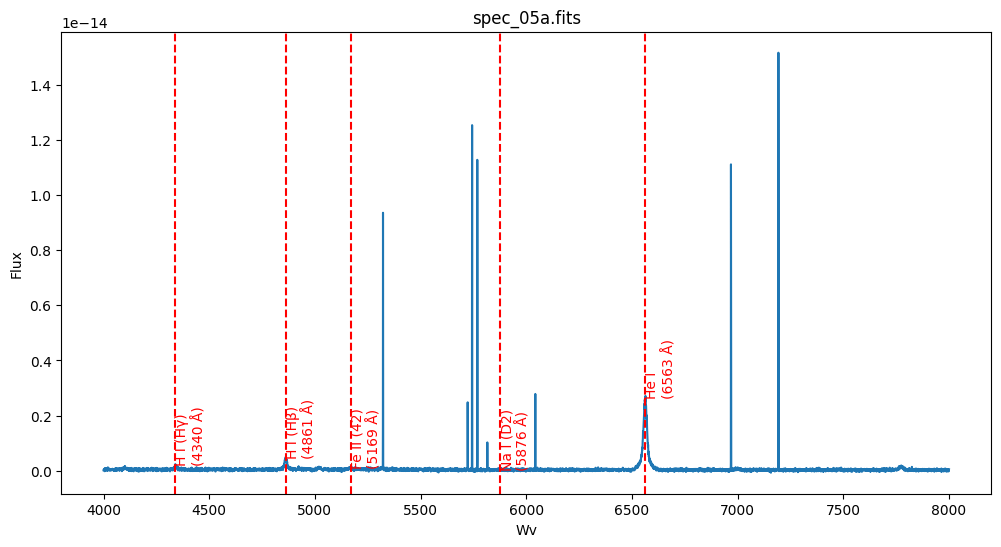


Exploring: spec_05b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


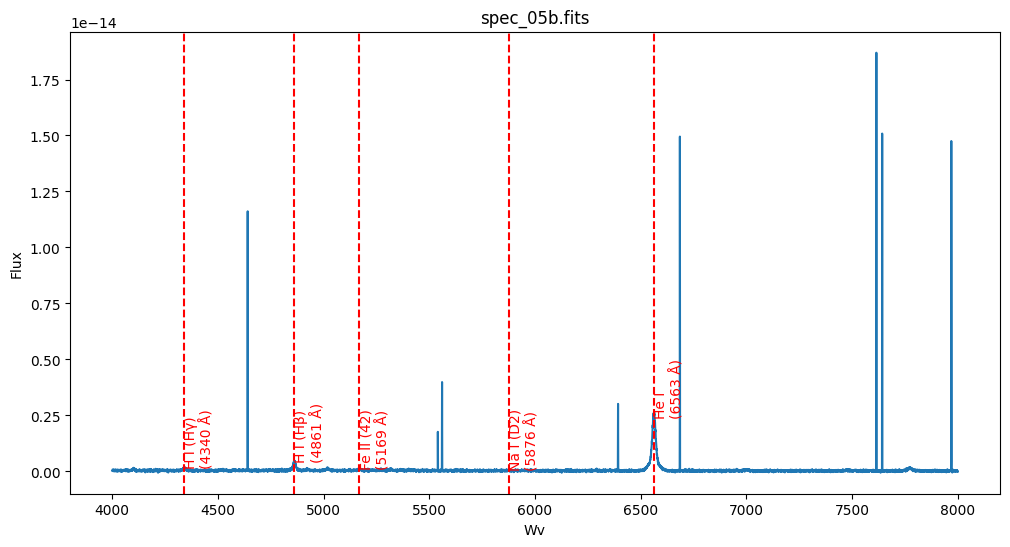


Exploring: spec_05c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


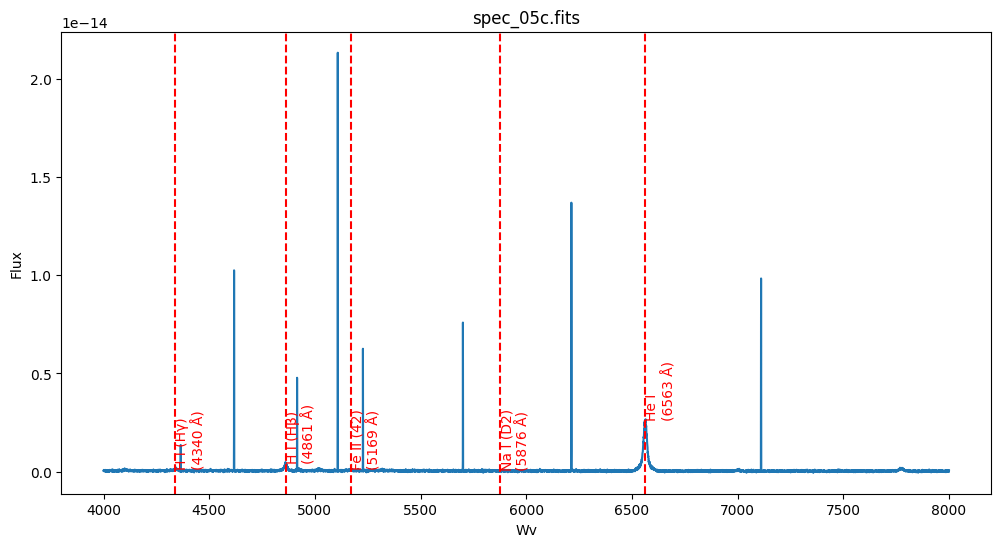


Exploring: spec_06a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


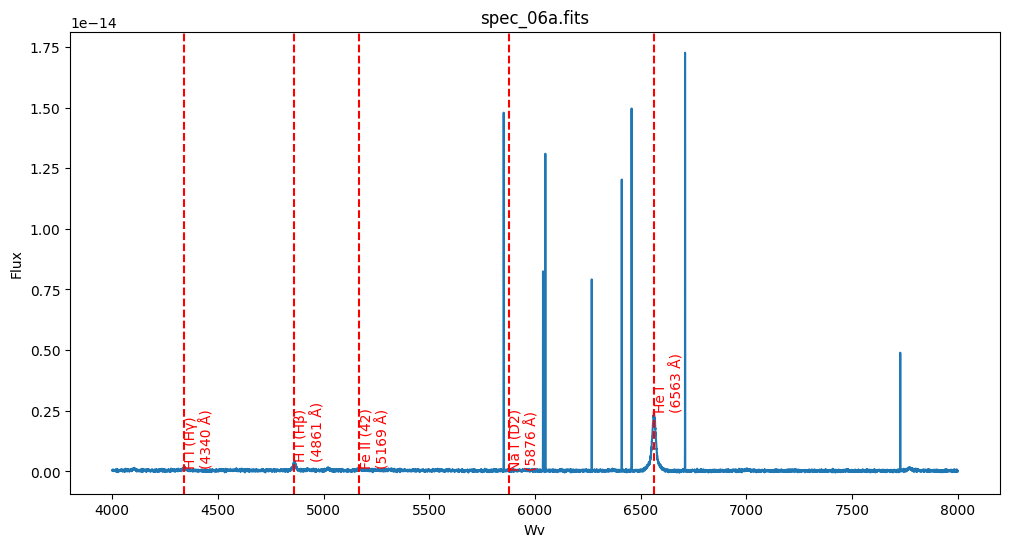


Exploring: spec_06b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


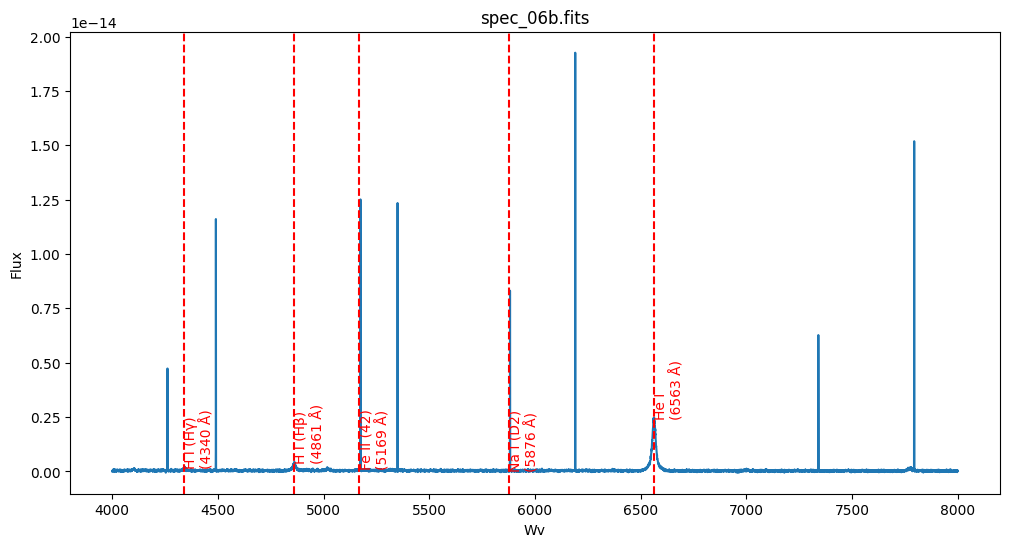


Exploring: spec_06c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


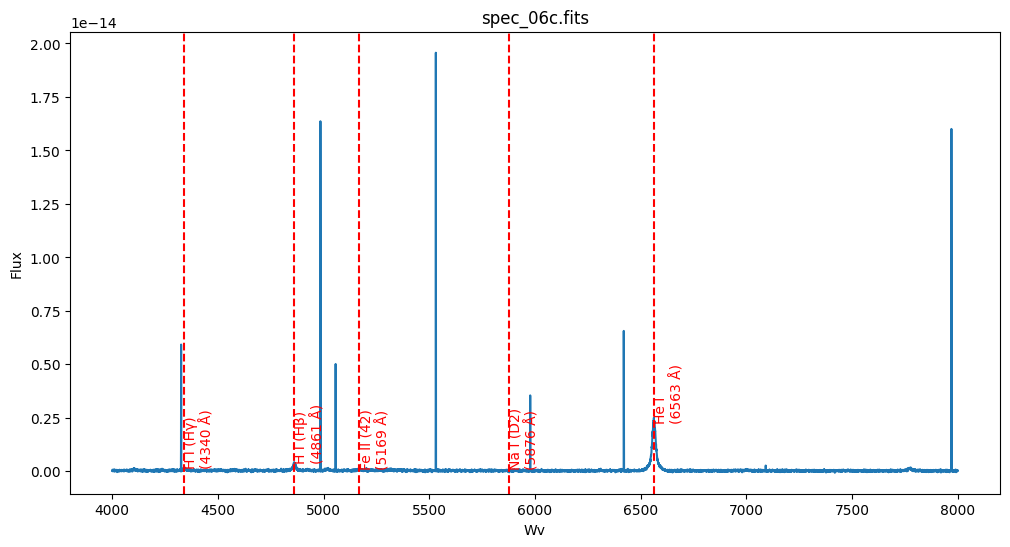


Exploring: spec_07a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


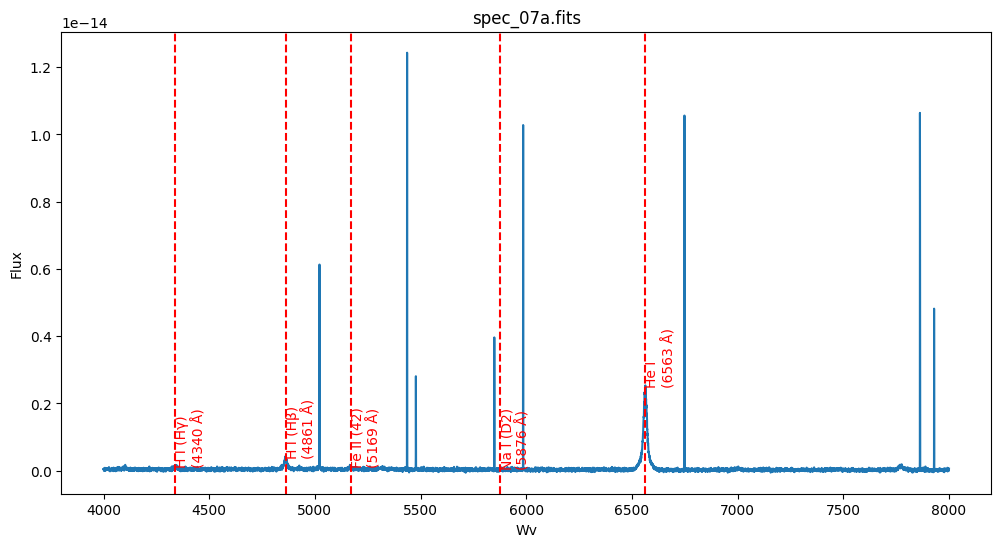


Exploring: spec_07b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


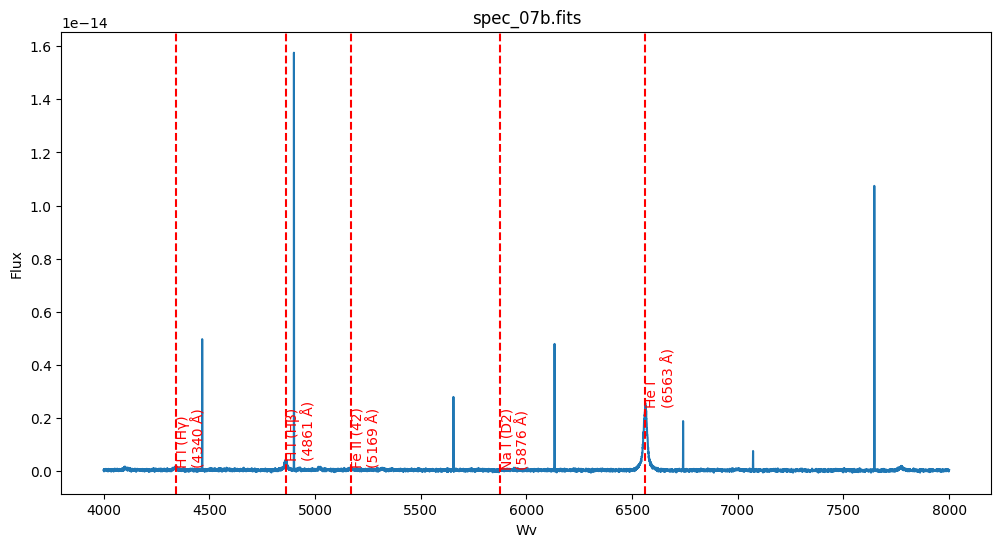


Exploring: spec_07c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


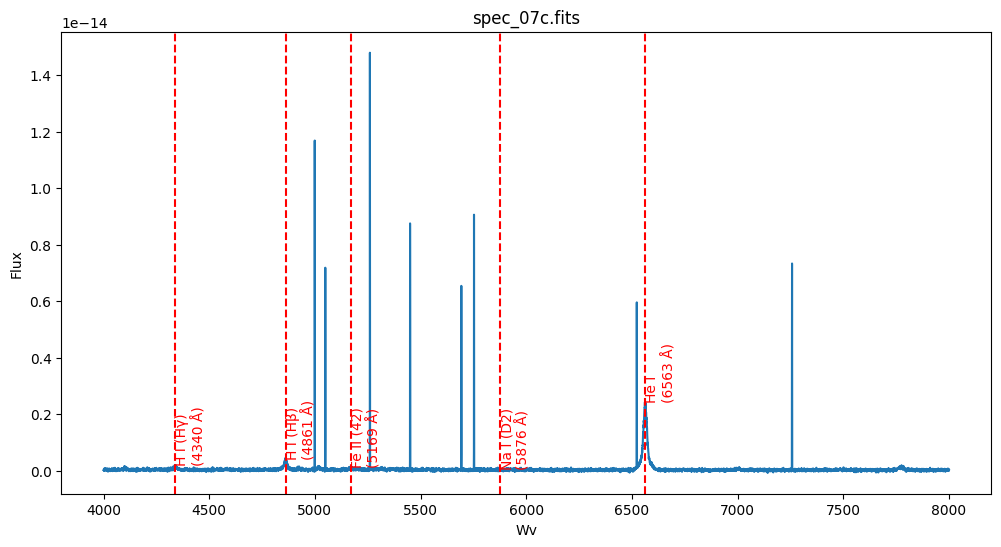


Exploring: spec_08a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


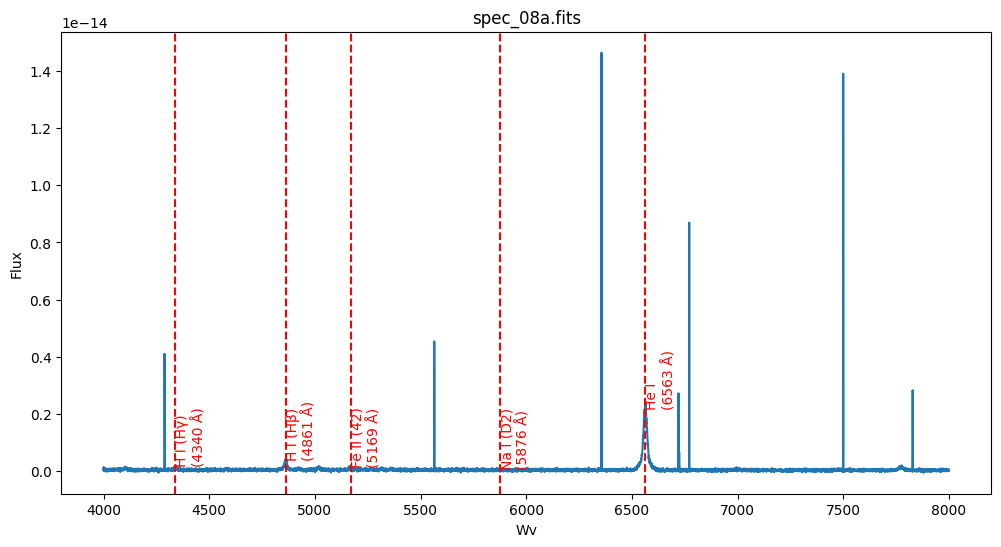


Exploring: spec_08b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


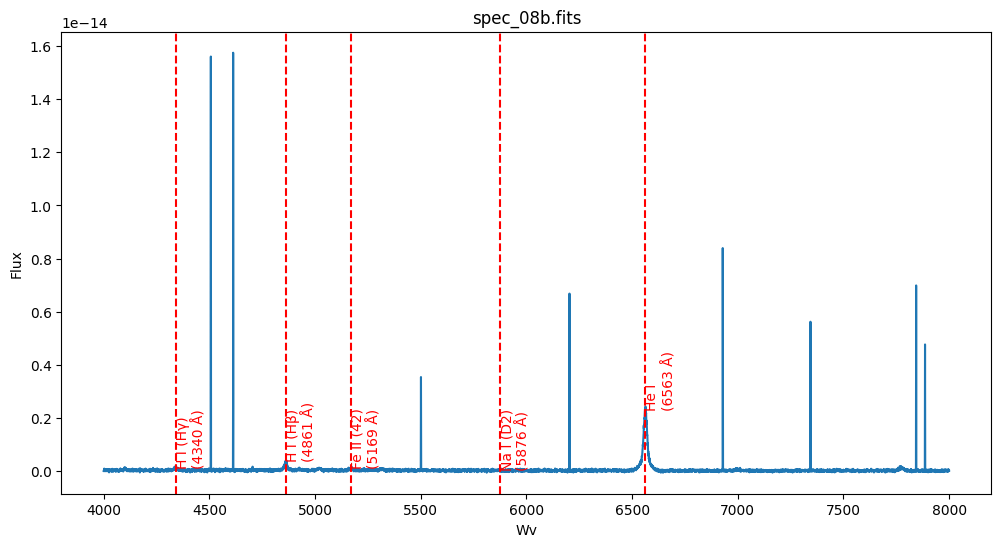


Exploring: spec_08c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


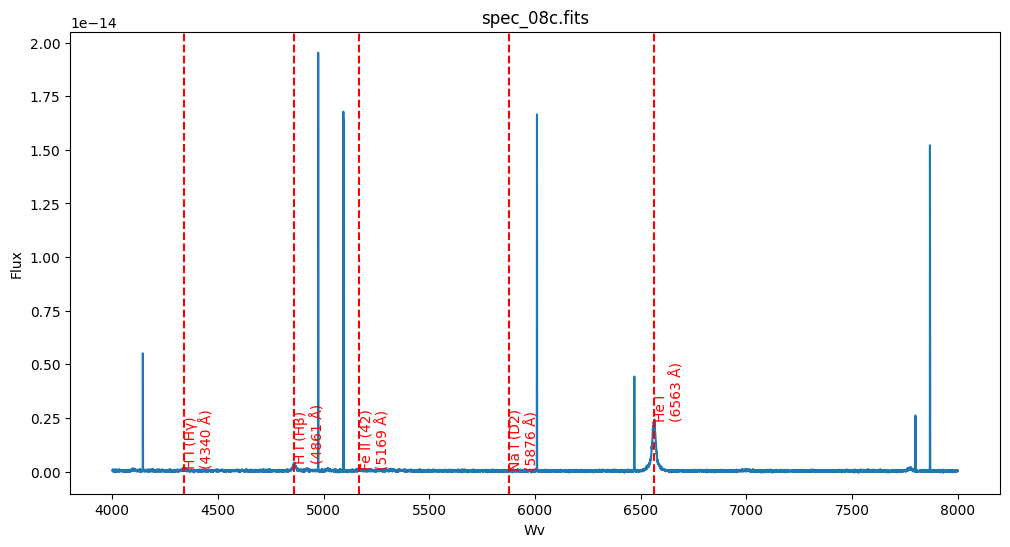


Exploring: spec_09a.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


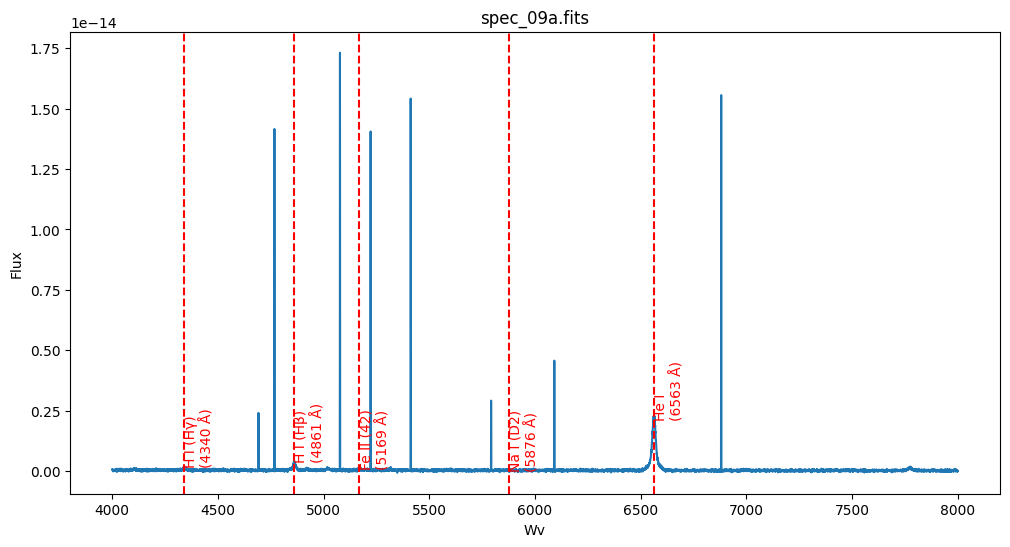


Exploring: spec_09b.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


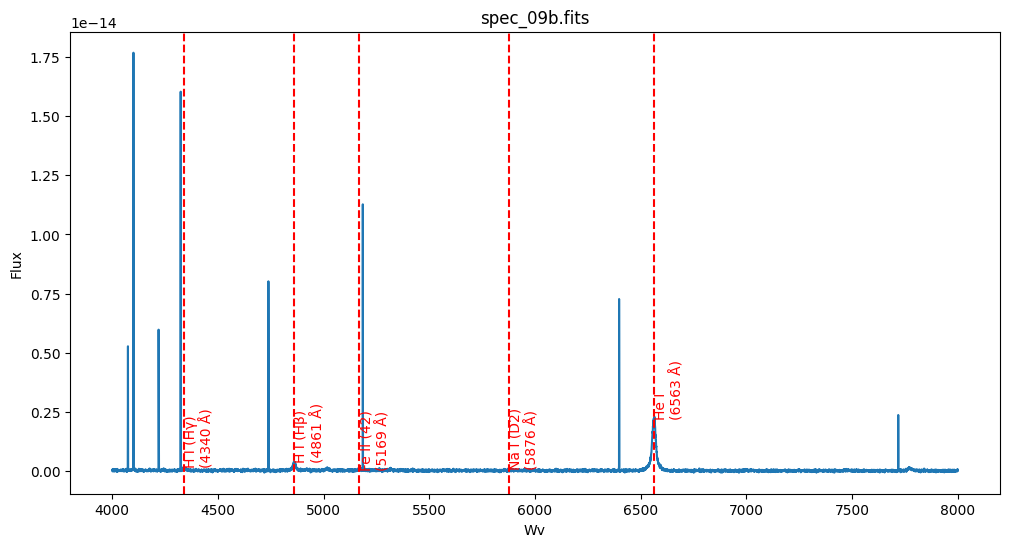


Exploring: spec_09c.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


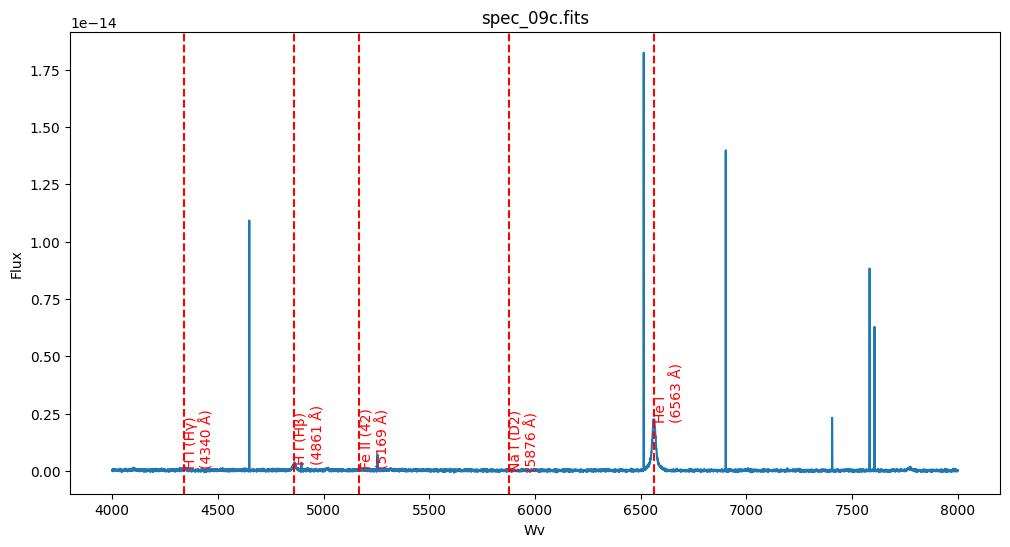

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise\2"

def plot_spec(wv, flux, title="Spec", xlabel="Wv", ylabel="Flux", lines=None, line_ids=None, wavelengths=None):
    plt.figure(figsize=(12, 6))
    plt.plot(wv, flux)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if lines:
        for line in lines:
            plt.axvline(x=line, color='r', linestyle='--')
            
            # Find the corresponding line ID
            line_id = "Unknown"  # Default if no match is found
            if wavelengths and line_ids:
                idx = wavelengths.index(line) if line in wavelengths else None
                if idx is not None:
                    line_id = line_ids[idx]

            # Find the nearest flux value for annotation
            idx = (np.abs(wv - line)).argmin()
            plt.text(line, flux[idx], f'{line_id}\n({line} Å)', rotation=90, verticalalignment='bottom', color='r')

    plt.show()

# --- Spectroscopy ---
spec_files = [f for f in os.listdir(wd) if f.startswith('spec_') and f.endswith('.fits')]
spec_files.sort()

# --- Emission Line Data ---
line_ids = [
    "H I (Hε)", "He I", "H I (Hδ)", "He I", "Fe II (28)", "C III", "He II",
    "Fe II (27)", "C III", "Fe II (28)", "Fe II (27)", "H I (Hγ)", "Fe II (27)",
    "Fe II (27)", "He I", "Fe II (27)", "He I", "He I", "Fe II (37)",
    "Fe II (38)", "Fe II (37)", "N III (3)", "Fe II (38)", "He II", "Fe II (38)",
    "Fe II (37)", "Fe II (38)", "N V (1)", "Fe II (37)", "N III", "He II", "He I",
    "H I (Hβ)", "He I", "Fe II (42)", "N V (1)", "N II (24)", "He I", "Fe II (42)",
    "He I", "Fe II (42)", "Fe II (49)", "Fe II (49)", "Fe II (48)", "O VI (1)",
    "Fe II (48)", "He II", "N II (29)", "Fe II (55)", "N II (3)", "He I", "Na I (D2)",
    "Na I (D1)", "H I (Hα)", "He I", "O I (1)"
]

wavelengths = [
    3970, 4026, 4102, 4144, 4179, 4187, 4200, 4233, 4267, 4297, 4303, 4340,
    4352, 4385, 4388, 4417, 4438, 4471, 4491, 4508, 4515, 4517, 4523, 4542,
    4549, 4556, 4584, 4609, 4629, 4638, 4686, 4713, 4861, 4922, 4924, 4945,
    5001, 5016, 5018, 5048, 5169, 5198, 5235, 5265, 5276, 5292, 5363, 5412,
    5479, 5535, 5679, 5876, 5890, 5896, 6563, 6678, 7773
]

spectral_classes = [
    "Fe II, He/N", "He/N", "Fe II, He/N", "He/N", "Fe II", "He/N", "He/N",
    "Fe II", "He/N", "Fe II", "Fe II", "Fe II, He/N", "Fe II", "Fe II", "He/N",
    "Fe II", "He/N", "He/N", "Fe II", "Fe II", "Fe II", "He/N", "Fe II", "He/N",
    "Fe II", "Fe II", "Fe II", "He/N", "Fe II", "He/N", "He/N", "He/N", "Fe II, He/N",
    "He/N", "Fe II", "He/N", "He/N", "He/N", "Fe II", "He/N", "Fe II", "Fe II",
    "Fe II", "Fe II", "He/N", "Fe II", "He/N", "He/N", "Fe II", "Fe II", "Fe II",
    "He/N", "He/N", "He/N", "Fe II, He/N", "He/N", "Fe II"
]

# Select a few emission lines for demonstration (e.g., H-alpha, H-beta, H-gamma, He I, Fe II)
example_lines = [6563, 4861, 4340, 5876, 5169]  # Wavelengths of the example lines

if spec_files:
    print(f"Found {len(spec_files)} spec files.")
    for f in spec_files:
        path = os.path.join(wd, f)
        try:
            with fits.open(path) as file:
                flux = file[0].data
                if flux.dtype.byteorder == '>':
                    flux = flux.byteswap().view(flux.dtype.newbyteorder('<'))
                hdr = file[0].header
                time_map = {
                    'spec_00': 2.48, 'spec_01': 5.33, 'spec_02': 10.44, 'spec_03': 15.73,
                    'spec_04': 30.23, 'spec_05': 34.71, 'spec_06': 43.55, 'spec_07': 43.58,
                    'spec_08': 48.19, 'spec_09': 59.03
                }
                pre = f.split('.')[0]
                t_obs = time_map.get(pre, 'N/A')
                print(f"\nExploring: {f}")
                print(f"Shape: {flux.shape}, Type: {flux.dtype}, Time: {t_obs}")
                
                # --- Calculate Wavelength ---
                # Get reference wavelength and wavelength step from the header
                crval1 = hdr['CRVAL1']
                cdelt1 = hdr['CDELT1']

                # Create a wavelength array
                n_pix = len(flux)
                wv = crval1 + np.arange(n_pix) * cdelt1
                
                print(f"Min Flux: {np.min(flux):.2f}, Max Flux: {np.max(flux):.2f}, Mean Flux: {np.mean(flux):.2f}, Std Flux: {np.std(flux):.2f}")
                plot_spec(wv, flux, title=f"{f}", lines=example_lines, line_ids=line_ids, wavelengths=wavelengths)
        except Exception as e:
            print(f"Error with {f}: {e}")

spec_00a.fits: H I (Hα) Flux = 1.14e-13
spec_00a.fits: H I (Hβ) Flux = 1.91e-14
spec_00a.fits: H I (Hγ) Flux = 7.37e-15
spec_00a.fits: Fe II (42) Flux = 1.05e-14
spec_00a.fits: He I Flux = 5.06e-15


C:\Users\friesco\AppData\Local\Temp\ipykernel_1304\2009669591.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  line_flux = np.trapz(flux[region], wavelength[region])  # Using np.trapz


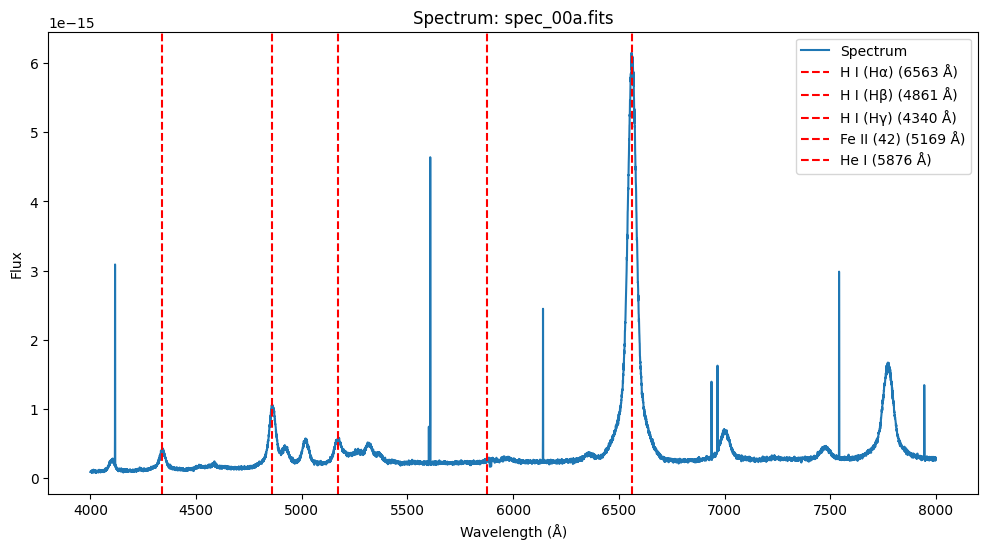

spec_00b.fits: H I (Hα) Flux = 1.14e-13
spec_00b.fits: H I (Hβ) Flux = 1.91e-14
spec_00b.fits: H I (Hγ) Flux = 7.36e-15
spec_00b.fits: Fe II (42) Flux = 1.05e-14
spec_00b.fits: He I Flux = 5.00e-15


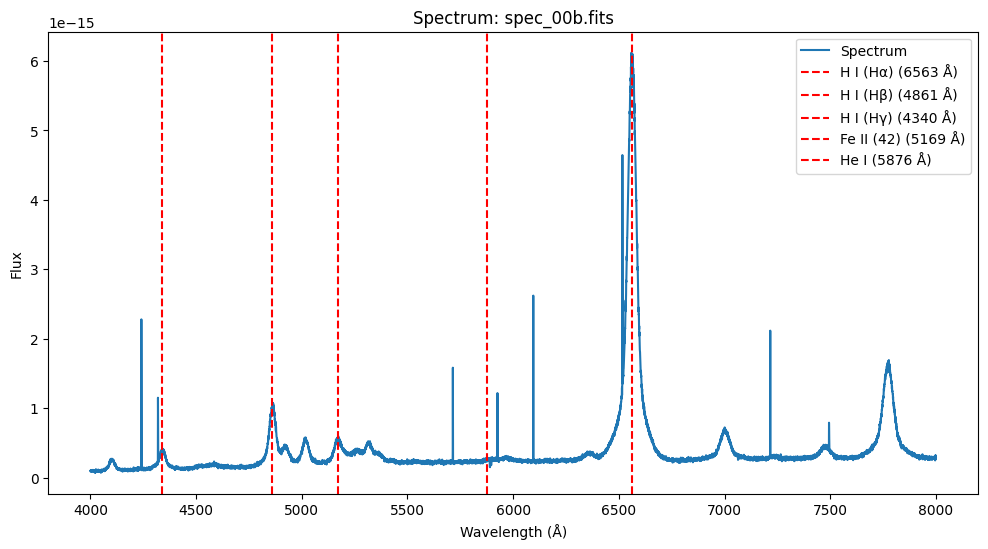

spec_00c.fits: H I (Hα) Flux = 1.14e-13
spec_00c.fits: H I (Hβ) Flux = 1.91e-14
spec_00c.fits: H I (Hγ) Flux = 7.45e-15
spec_00c.fits: Fe II (42) Flux = 1.05e-14
spec_00c.fits: He I Flux = 5.05e-15


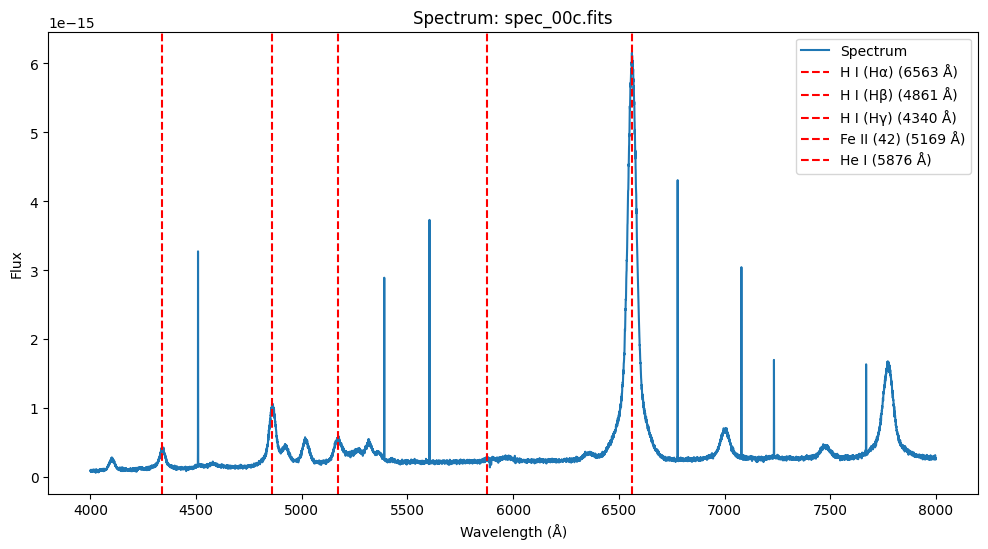

spec_01a.fits: H I (Hα) Flux = 8.96e-14
spec_01a.fits: H I (Hβ) Flux = 1.42e-14
spec_01a.fits: H I (Hγ) Flux = 5.49e-15
spec_01a.fits: Fe II (42) Flux = 4.53e-15
spec_01a.fits: He I Flux = 1.73e-15


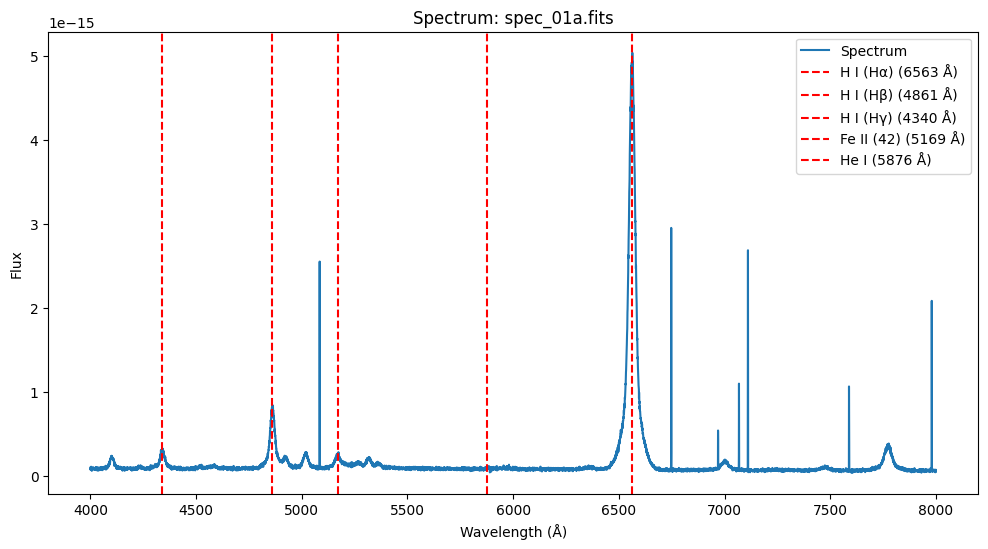

spec_01b.fits: H I (Hα) Flux = 8.99e-14
spec_01b.fits: H I (Hβ) Flux = 1.42e-14
spec_01b.fits: H I (Hγ) Flux = 5.55e-15
spec_01b.fits: Fe II (42) Flux = 4.55e-15
spec_01b.fits: He I Flux = 1.70e-15


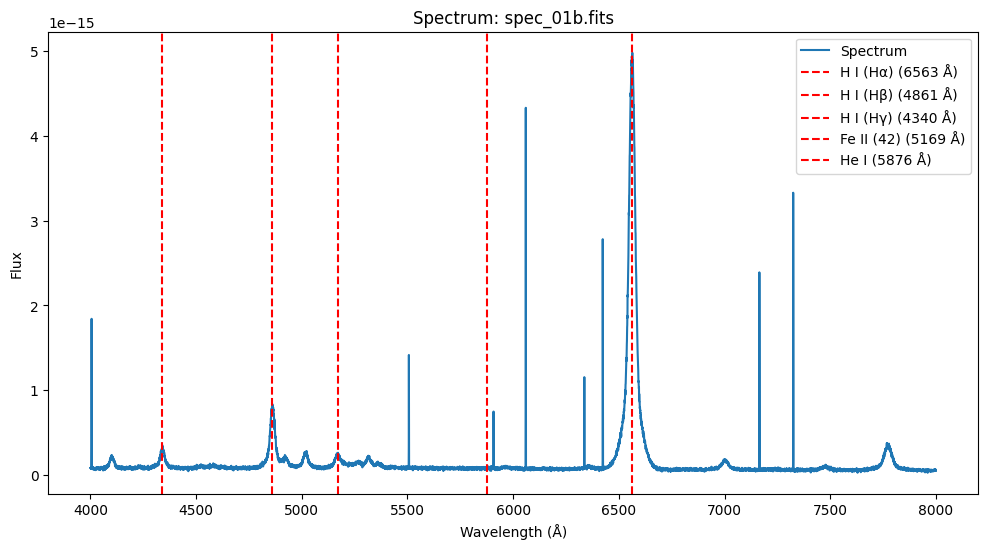

spec_01c.fits: H I (Hα) Flux = 8.98e-14
spec_01c.fits: H I (Hβ) Flux = 1.42e-14
spec_01c.fits: H I (Hγ) Flux = 5.46e-15
spec_01c.fits: Fe II (42) Flux = 4.61e-15
spec_01c.fits: He I Flux = 1.68e-15


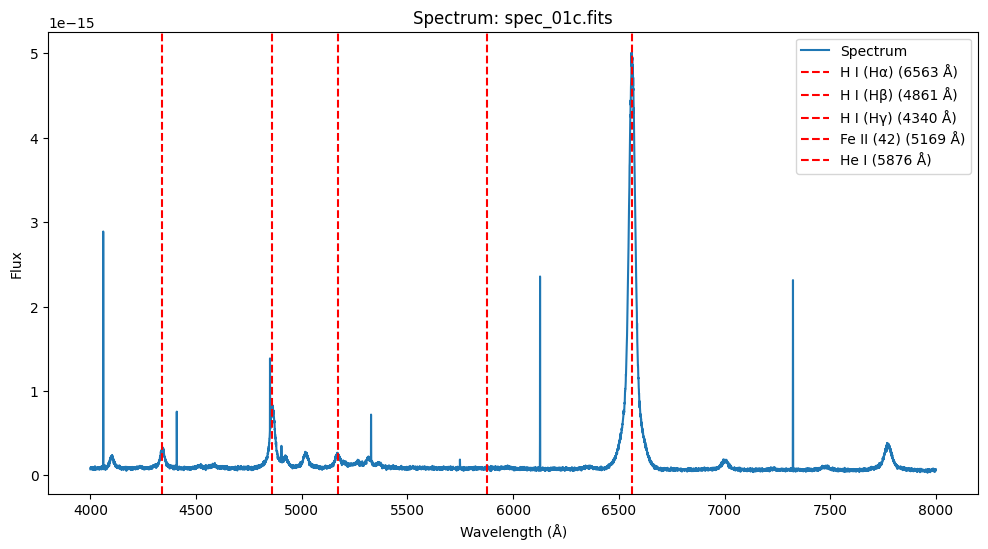

spec_02a.fits: H I (Hα) Flux = 7.07e-14
spec_02a.fits: H I (Hβ) Flux = 1.08e-14
spec_02a.fits: H I (Hγ) Flux = 4.21e-15
spec_02a.fits: Fe II (42) Flux = 3.28e-15
spec_02a.fits: He I Flux = 1.24e-15


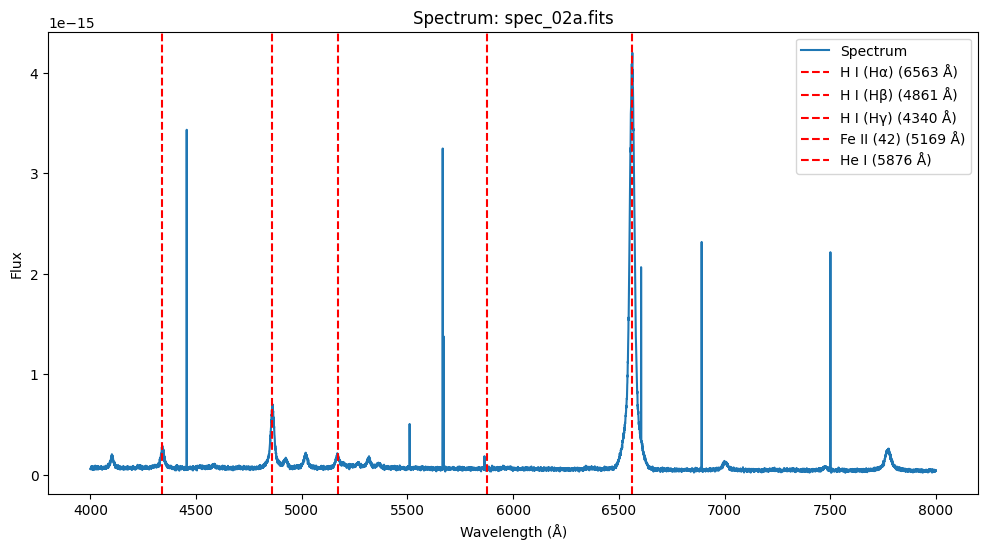

spec_02b.fits: H I (Hα) Flux = 7.03e-14
spec_02b.fits: H I (Hβ) Flux = 1.07e-14
spec_02b.fits: H I (Hγ) Flux = 4.22e-15
spec_02b.fits: Fe II (42) Flux = 3.19e-15
spec_02b.fits: He I Flux = 1.24e-15


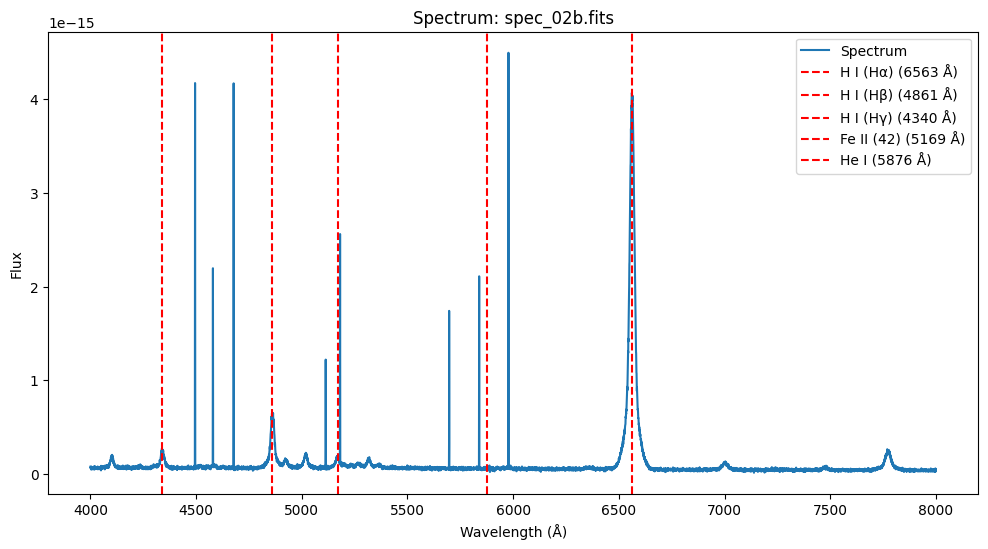

spec_02c.fits: H I (Hα) Flux = 7.02e-14
spec_02c.fits: H I (Hβ) Flux = 1.08e-14
spec_02c.fits: H I (Hγ) Flux = 4.23e-15
spec_02c.fits: Fe II (42) Flux = 3.21e-15
spec_02c.fits: He I Flux = 1.22e-15


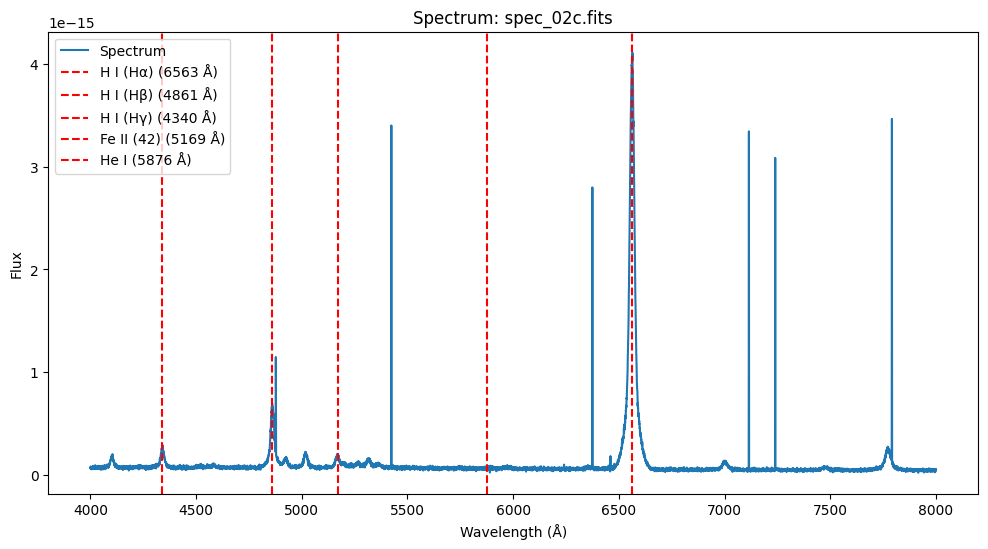

spec_03a.fits: H I (Hα) Flux = 6.00e-14
spec_03a.fits: H I (Hβ) Flux = 8.87e-15
spec_03a.fits: H I (Hγ) Flux = 3.59e-15
spec_03a.fits: Fe II (42) Flux = 2.66e-15
spec_03a.fits: He I Flux = 1.05e-15


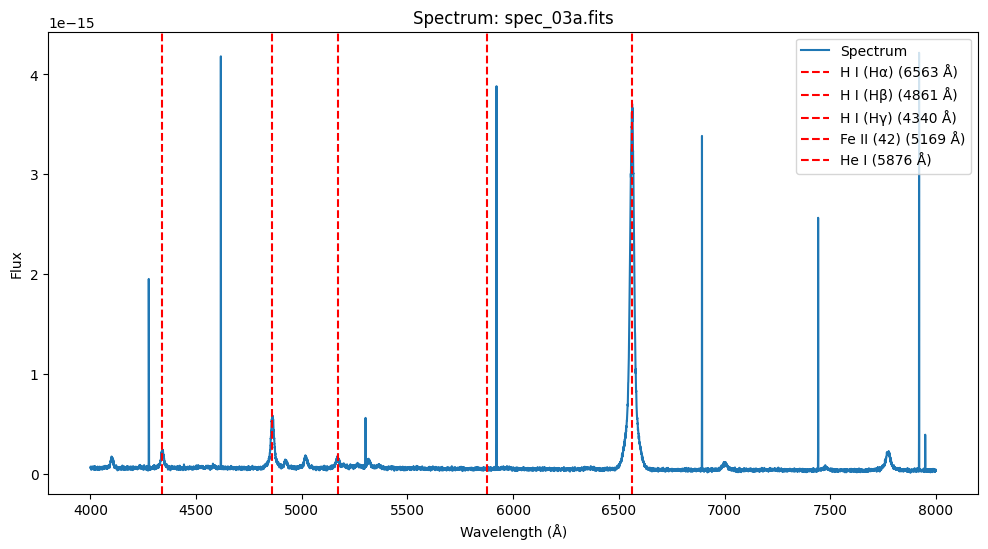

spec_03b.fits: H I (Hα) Flux = 5.99e-14
spec_03b.fits: H I (Hβ) Flux = 9.06e-15
spec_03b.fits: H I (Hγ) Flux = 3.53e-15
spec_03b.fits: Fe II (42) Flux = 2.64e-15
spec_03b.fits: He I Flux = 1.07e-15


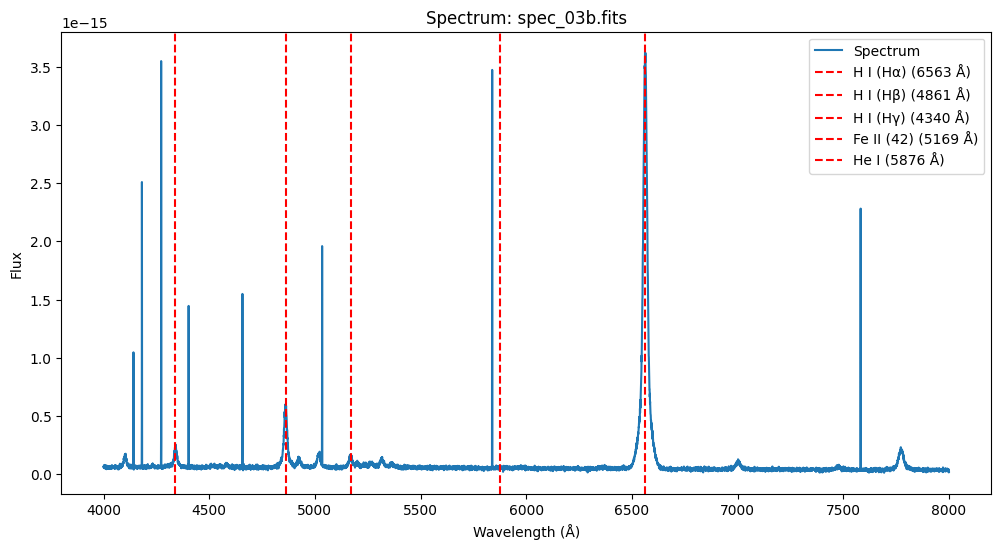

spec_03c.fits: H I (Hα) Flux = 5.96e-14
spec_03c.fits: H I (Hβ) Flux = 8.84e-15
spec_03c.fits: H I (Hγ) Flux = 3.47e-15
spec_03c.fits: Fe II (42) Flux = 2.71e-15
spec_03c.fits: He I Flux = 2.06e-15


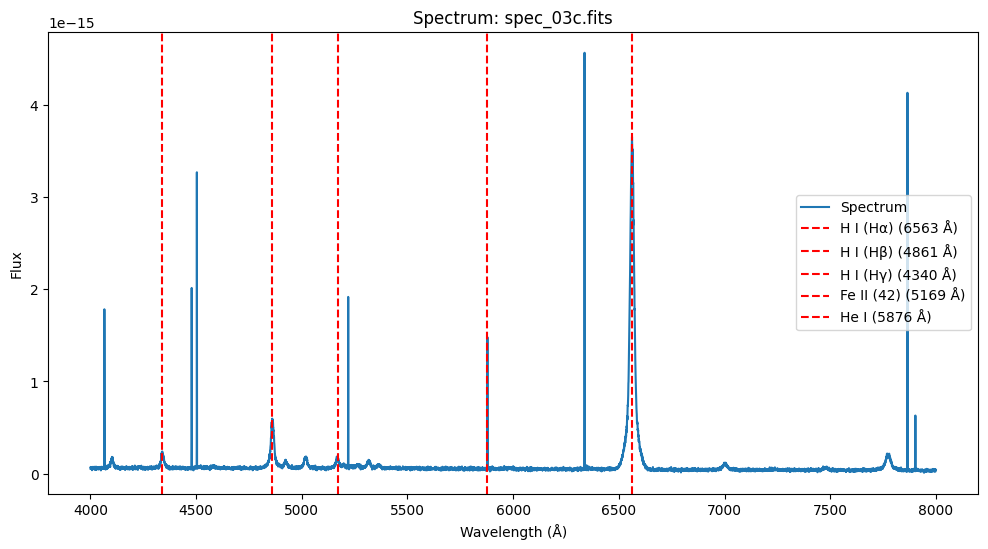

spec_04a.fits: H I (Hα) Flux = 4.37e-14
spec_04a.fits: H I (Hβ) Flux = 6.35e-15
spec_04a.fits: H I (Hγ) Flux = 2.57e-15
spec_04a.fits: Fe II (42) Flux = 1.94e-15
spec_04a.fits: He I Flux = 8.17e-16


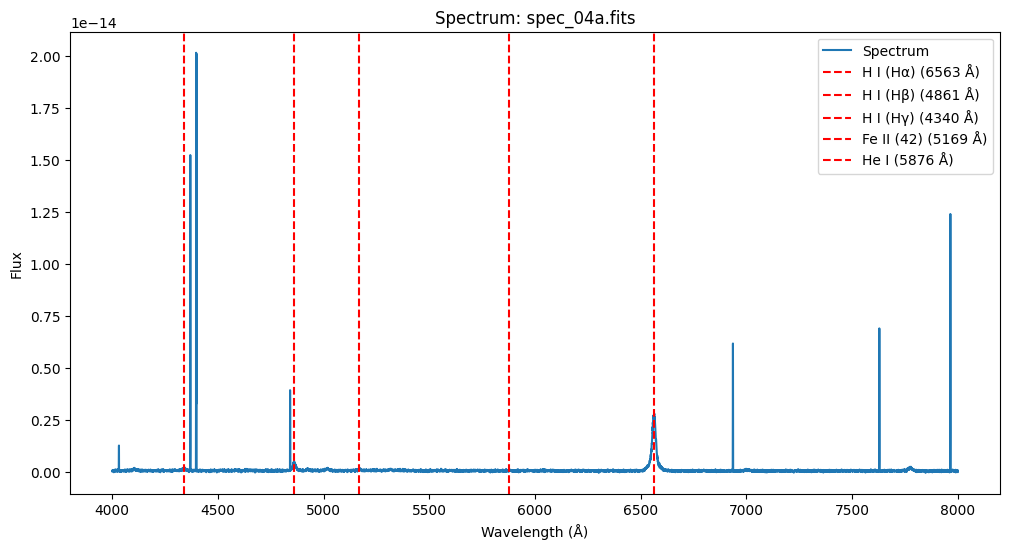

spec_04b.fits: H I (Hα) Flux = 4.35e-14
spec_04b.fits: H I (Hβ) Flux = 6.30e-15
spec_04b.fits: H I (Hγ) Flux = 2.50e-15
spec_04b.fits: Fe II (42) Flux = 2.01e-15
spec_04b.fits: He I Flux = 7.90e-16


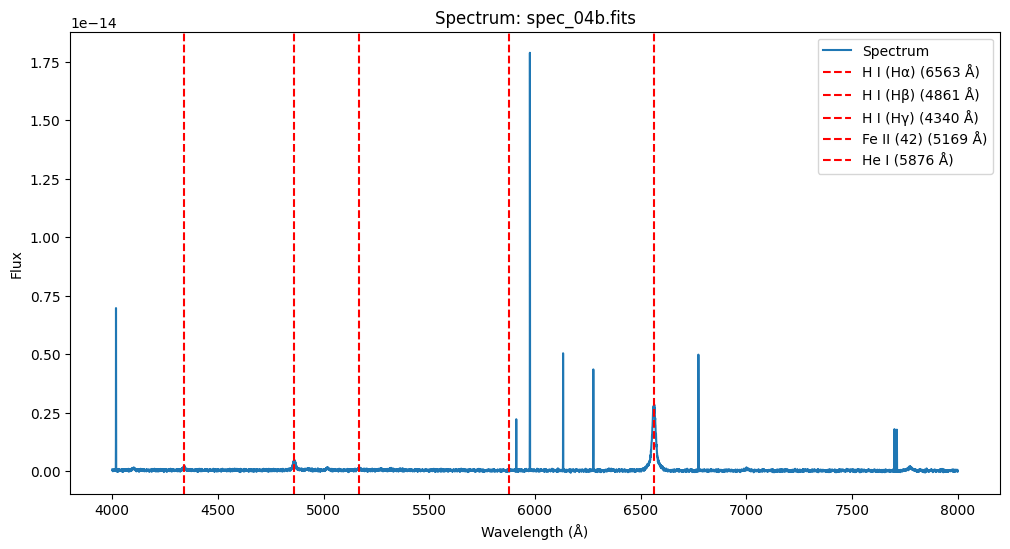

spec_04c.fits: H I (Hα) Flux = 4.36e-14
spec_04c.fits: H I (Hβ) Flux = 6.42e-15
spec_04c.fits: H I (Hγ) Flux = 2.63e-15
spec_04c.fits: Fe II (42) Flux = 1.82e-15
spec_04c.fits: He I Flux = 8.68e-16


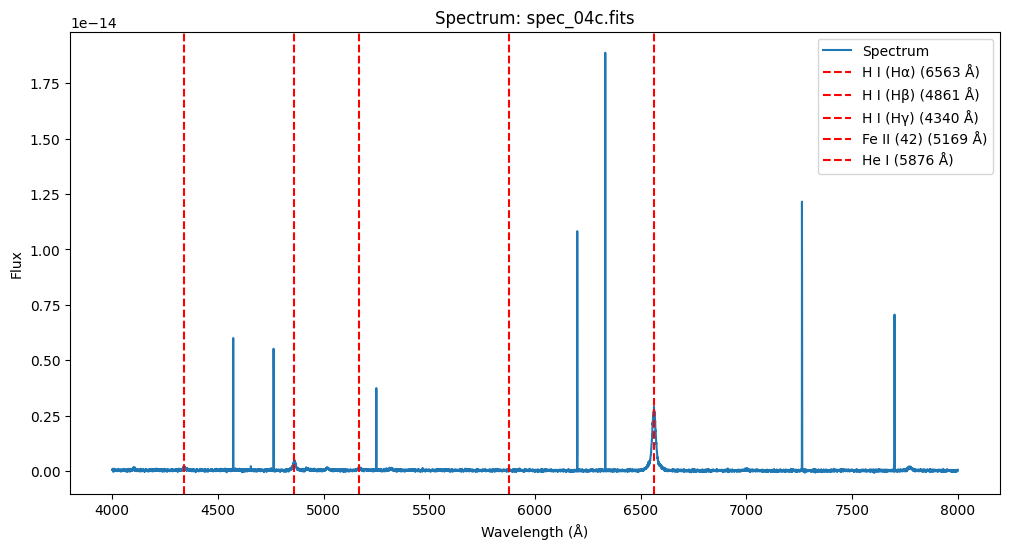

spec_05a.fits: H I (Hα) Flux = 4.12e-14
spec_05a.fits: H I (Hβ) Flux = 6.09e-15
spec_05a.fits: H I (Hγ) Flux = 2.43e-15
spec_05a.fits: Fe II (42) Flux = 1.76e-15
spec_05a.fits: He I Flux = 7.77e-16


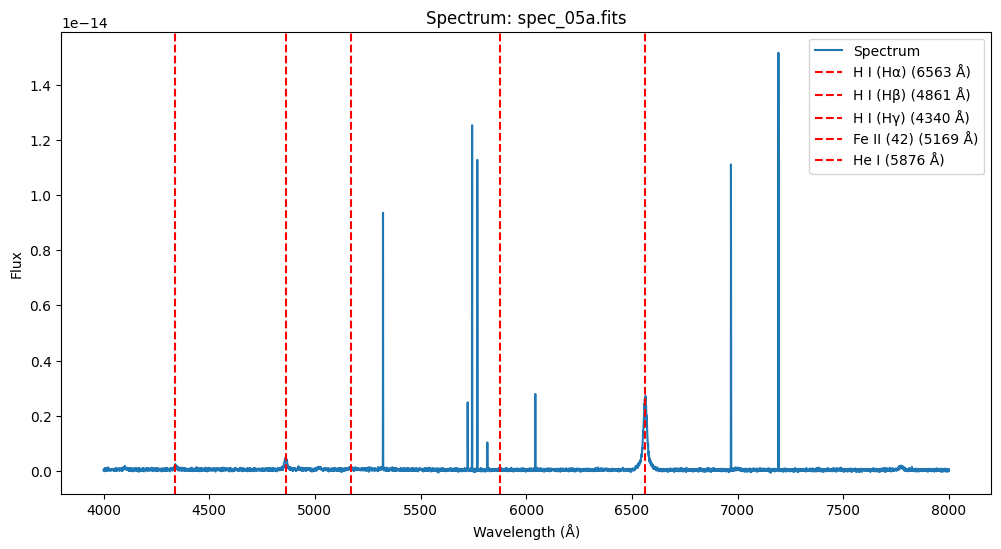

spec_05b.fits: H I (Hα) Flux = 4.04e-14
spec_05b.fits: H I (Hβ) Flux = 6.11e-15
spec_05b.fits: H I (Hγ) Flux = 2.36e-15
spec_05b.fits: Fe II (42) Flux = 1.64e-15
spec_05b.fits: He I Flux = 7.24e-16


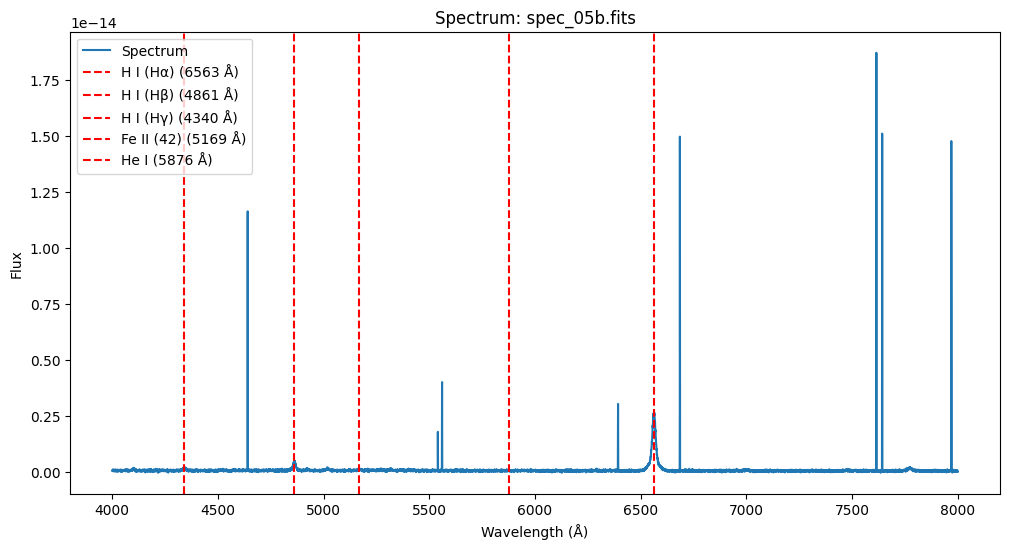

spec_05c.fits: H I (Hα) Flux = 4.09e-14
spec_05c.fits: H I (Hβ) Flux = 5.94e-15
spec_05c.fits: H I (Hγ) Flux = 2.41e-15
spec_05c.fits: Fe II (42) Flux = 1.74e-15
spec_05c.fits: He I Flux = 8.16e-16


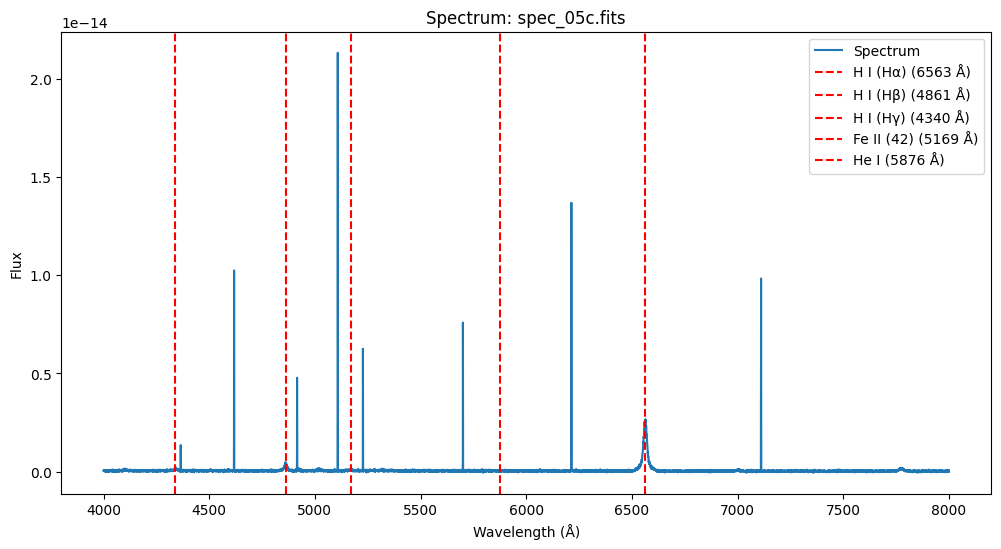

spec_06a.fits: H I (Hα) Flux = 3.75e-14
spec_06a.fits: H I (Hβ) Flux = 5.48e-15
spec_06a.fits: H I (Hγ) Flux = 2.24e-15
spec_06a.fits: Fe II (42) Flux = 1.67e-15
spec_06a.fits: He I Flux = 6.74e-16


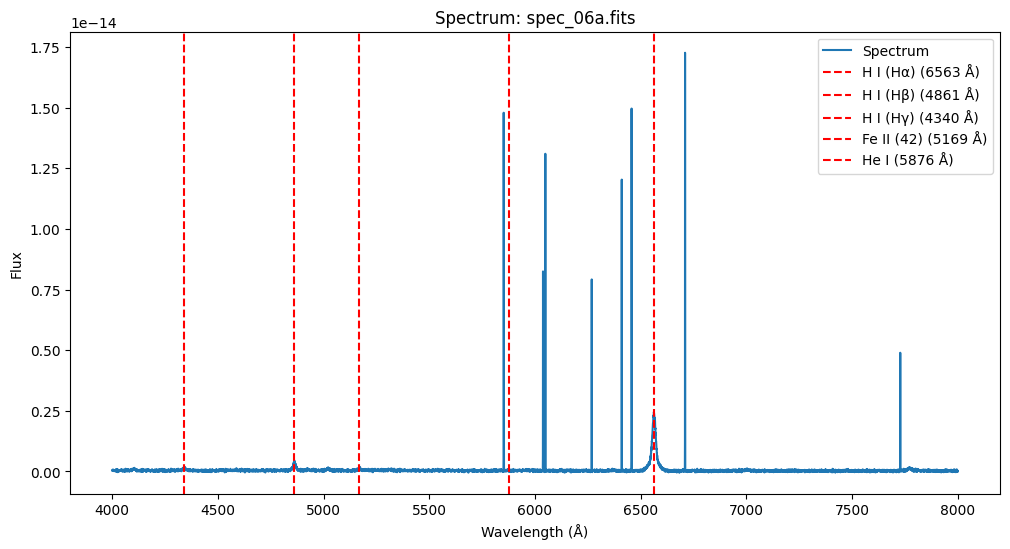

spec_06b.fits: H I (Hα) Flux = 3.75e-14
spec_06b.fits: H I (Hβ) Flux = 5.55e-15
spec_06b.fits: H I (Hγ) Flux = 2.21e-15
spec_06b.fits: Fe II (42) Flux = 1.04e-14
spec_06b.fits: He I Flux = 6.38e-15


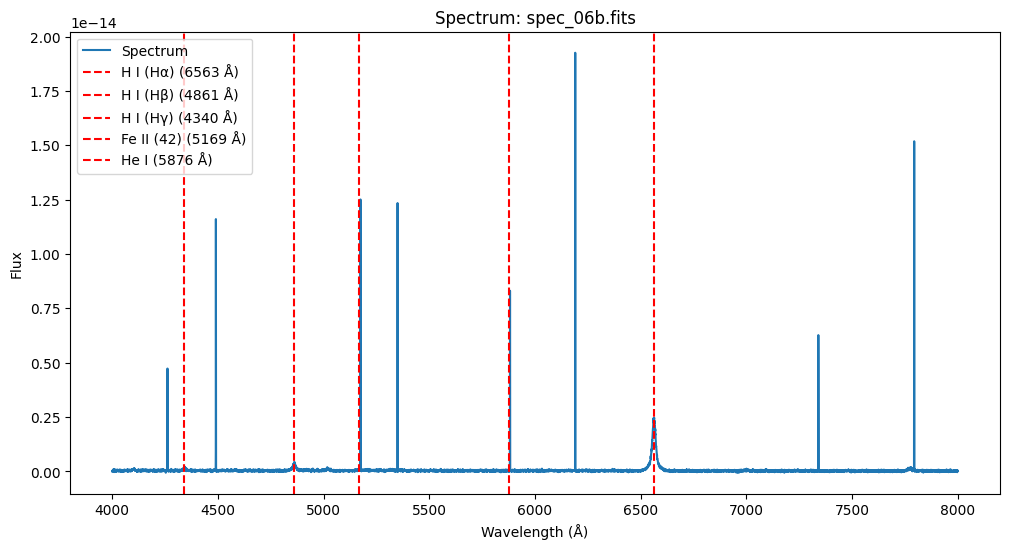

spec_06c.fits: H I (Hα) Flux = 3.75e-14
spec_06c.fits: H I (Hβ) Flux = 5.61e-15
spec_06c.fits: H I (Hγ) Flux = 2.04e-15
spec_06c.fits: Fe II (42) Flux = 1.65e-15
spec_06c.fits: He I Flux = 6.58e-16


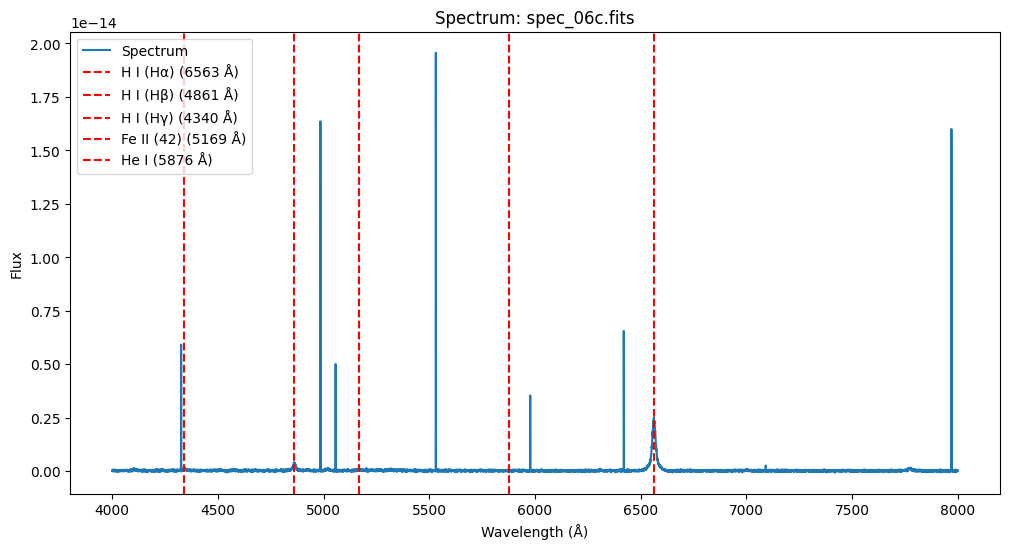

spec_07a.fits: H I (Hα) Flux = 3.78e-14
spec_07a.fits: H I (Hβ) Flux = 5.38e-15
spec_07a.fits: H I (Hγ) Flux = 2.22e-15
spec_07a.fits: Fe II (42) Flux = 1.69e-15
spec_07a.fits: He I Flux = 6.84e-16


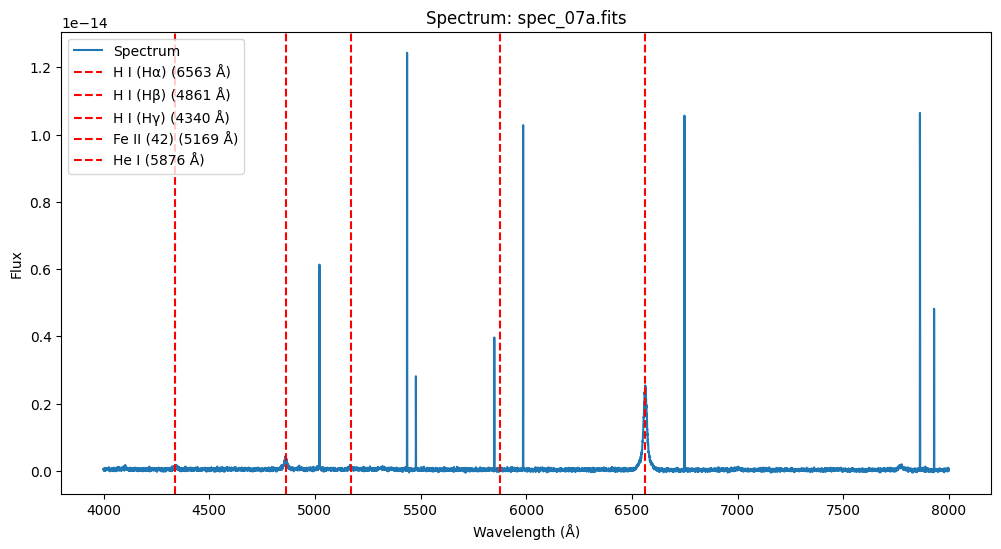

spec_07b.fits: H I (Hα) Flux = 3.75e-14
spec_07b.fits: H I (Hβ) Flux = 5.49e-15
spec_07b.fits: H I (Hγ) Flux = 2.28e-15
spec_07b.fits: Fe II (42) Flux = 1.69e-15
spec_07b.fits: He I Flux = 7.26e-16


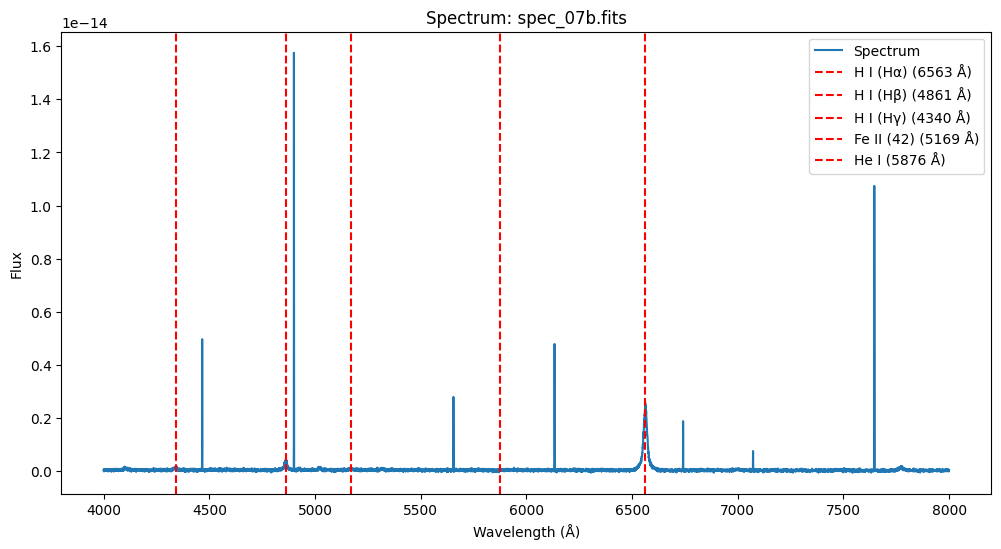

spec_07c.fits: H I (Hα) Flux = 3.78e-14
spec_07c.fits: H I (Hβ) Flux = 5.66e-15
spec_07c.fits: H I (Hγ) Flux = 2.28e-15
spec_07c.fits: Fe II (42) Flux = 1.67e-15
spec_07c.fits: He I Flux = 6.52e-16


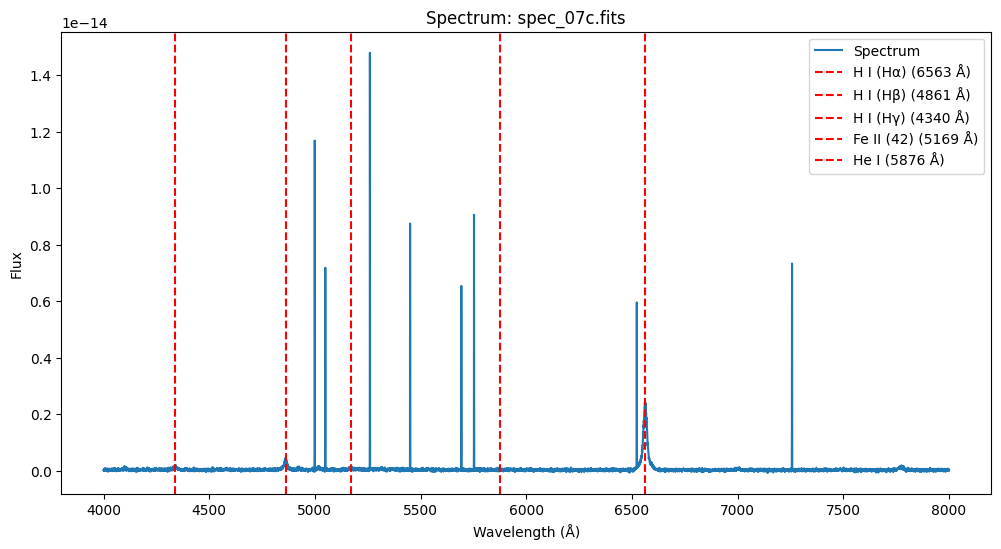

spec_08a.fits: H I (Hα) Flux = 3.65e-14
spec_08a.fits: H I (Hβ) Flux = 5.34e-15
spec_08a.fits: H I (Hγ) Flux = 2.08e-15
spec_08a.fits: Fe II (42) Flux = 1.68e-15
spec_08a.fits: He I Flux = 6.34e-16


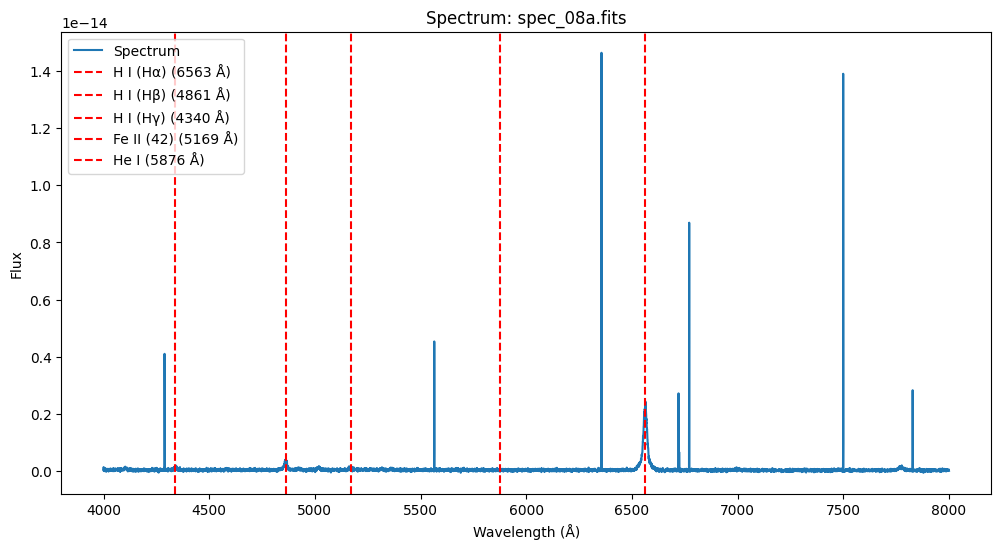

spec_08b.fits: H I (Hα) Flux = 3.68e-14
spec_08b.fits: H I (Hβ) Flux = 5.30e-15
spec_08b.fits: H I (Hγ) Flux = 2.19e-15
spec_08b.fits: Fe II (42) Flux = 1.59e-15
spec_08b.fits: He I Flux = 7.78e-16


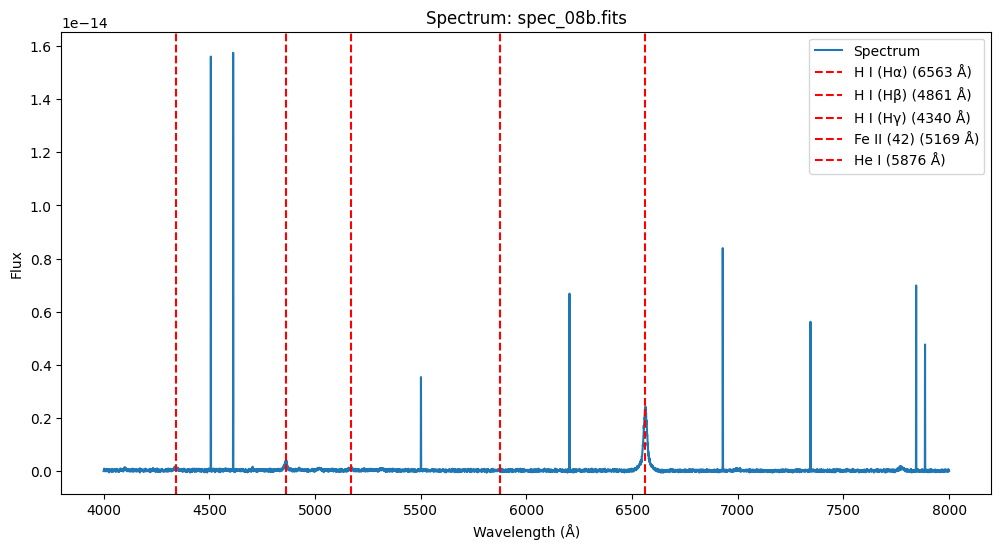

spec_08c.fits: H I (Hα) Flux = 3.66e-14
spec_08c.fits: H I (Hβ) Flux = 5.14e-15
spec_08c.fits: H I (Hγ) Flux = 2.17e-15
spec_08c.fits: Fe II (42) Flux = 1.79e-15
spec_08c.fits: He I Flux = 7.55e-16


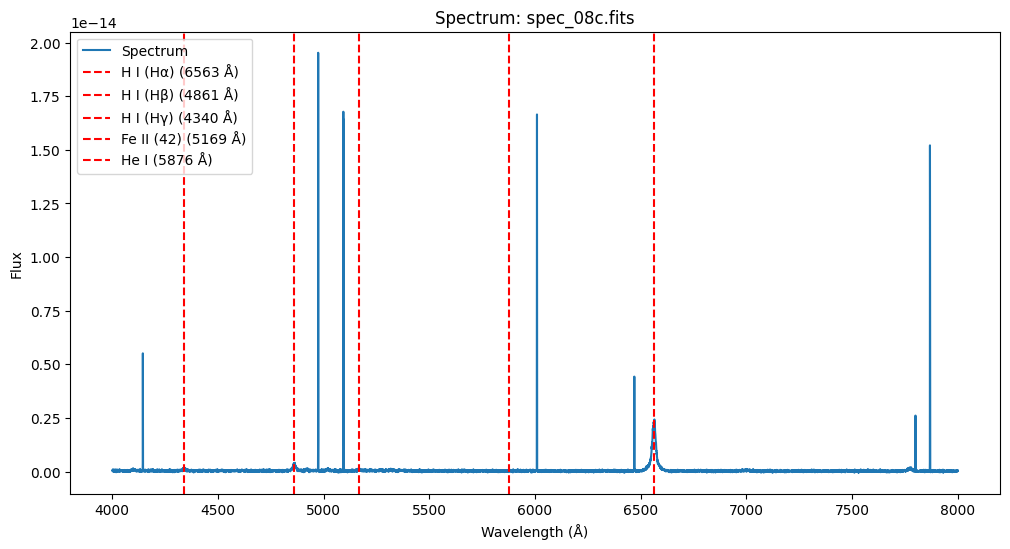

spec_09a.fits: H I (Hα) Flux = 3.50e-14
spec_09a.fits: H I (Hβ) Flux = 5.07e-15
spec_09a.fits: H I (Hγ) Flux = 2.07e-15
spec_09a.fits: Fe II (42) Flux = 1.63e-15
spec_09a.fits: He I Flux = 6.07e-16


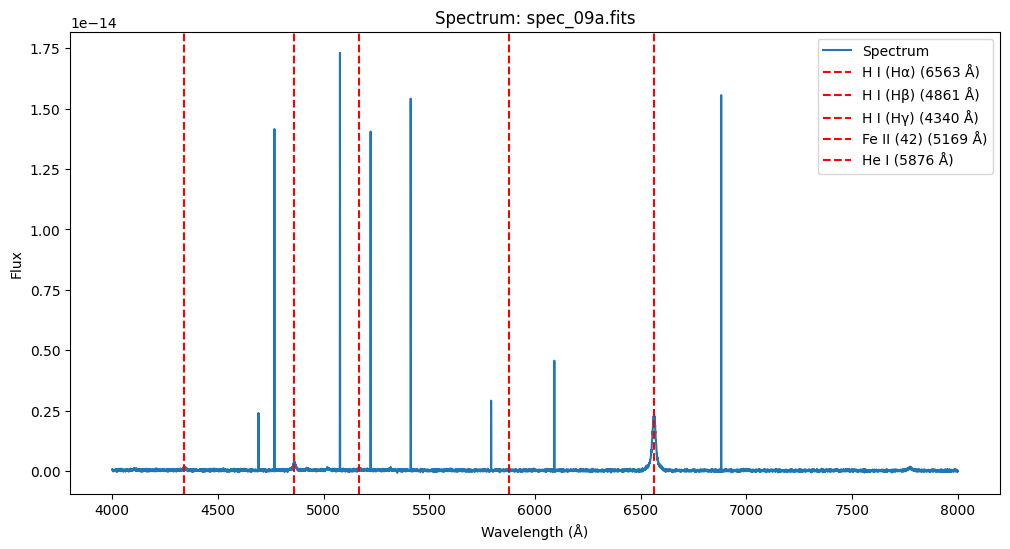

spec_09b.fits: H I (Hα) Flux = 3.51e-14
spec_09b.fits: H I (Hβ) Flux = 5.36e-15
spec_09b.fits: H I (Hγ) Flux = 2.10e-15
spec_09b.fits: Fe II (42) Flux = 1.66e-15
spec_09b.fits: He I Flux = 6.90e-16


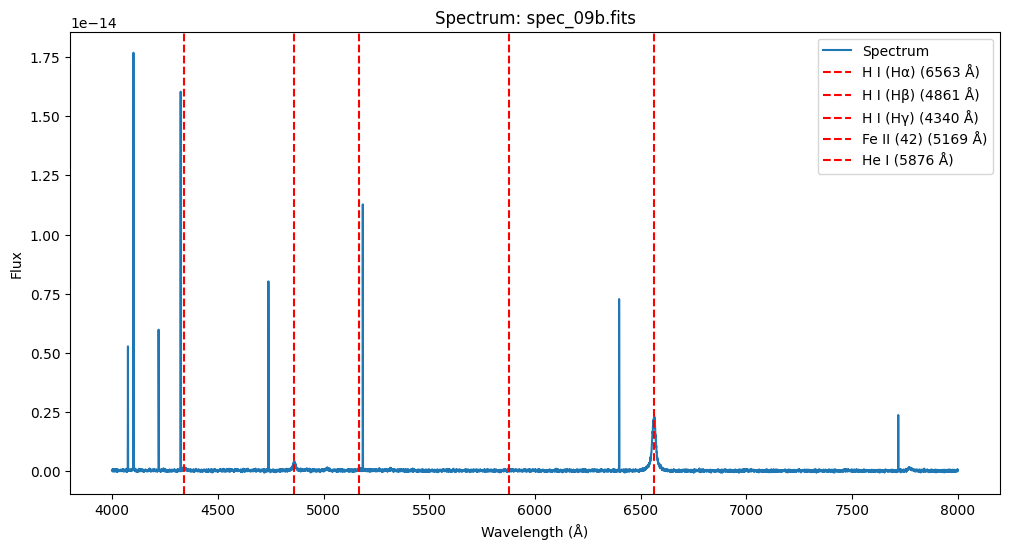

spec_09c.fits: H I (Hα) Flux = 3.50e-14
spec_09c.fits: H I (Hβ) Flux = 4.92e-15
spec_09c.fits: H I (Hγ) Flux = 2.13e-15
spec_09c.fits: Fe II (42) Flux = 1.45e-15
spec_09c.fits: He I Flux = 5.81e-16


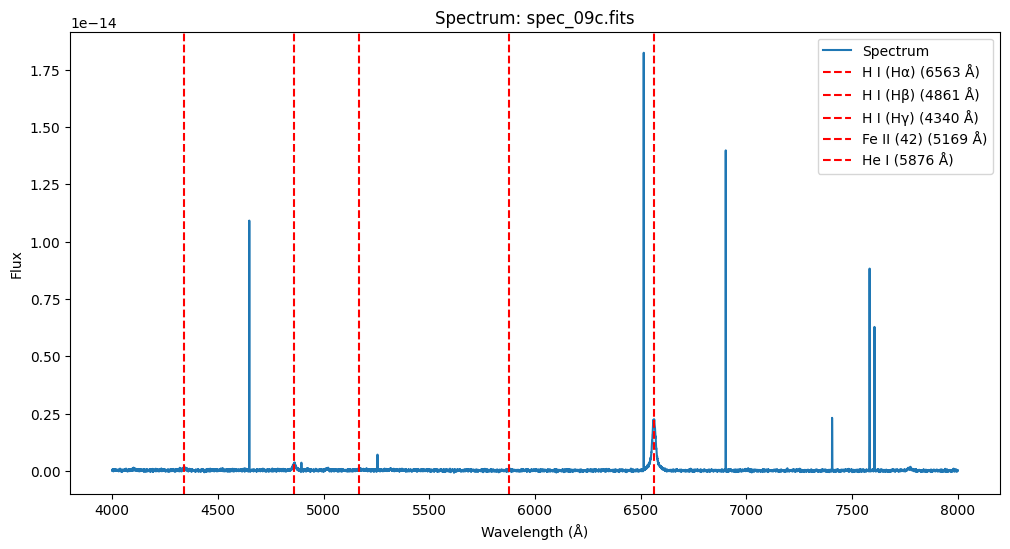

In [13]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Path to FITS files
wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise\2"

# Emission lines (Table 3)
line_ids = ["H I (Hα)", "H I (Hβ)", "H I (Hγ)", "Fe II (42)", "He I"]
rest_wavelengths = [6563, 4861, 4340, 5169, 5876]

# Load FITS files
spec_files = [f for f in os.listdir(wd) if f.startswith("spec_") and f.endswith(".fits")]
spec_files.sort()

# Analyze each file
for f in spec_files:
    file_path = os.path.join(wd, f)
    with fits.open(file_path) as hdul:
        flux = hdul[0].data
        hdr = hdul[0].header
        
        # Wavelength calibration
        crval1 = hdr['CRVAL1']
        cdelt1 = hdr['CDELT1']
        n_pix = len(flux)
        wavelength = crval1 + cdelt1 * np.arange(n_pix)
        
        # Plot spectrum
        plt.figure(figsize=(12, 6))
        plt.plot(wavelength, flux, label="Spectrum")
        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux")
        plt.title(f"Spectrum: {f}")
        
        # Analyze emission lines
        for line_id, rest_wv in zip(line_ids, rest_wavelengths):
            region = (wavelength > rest_wv - 10) & (wavelength < rest_wv + 10)
            line_flux = np.trapz(flux[region], wavelength[region])  # Using np.trapz
            
            # Mark the line on the plot
            plt.axvline(rest_wv, color="red", linestyle="--", label=f"{line_id} ({rest_wv} Å)")
            print(f"{f}: {line_id} Flux = {line_flux:.2e}")
        
        plt.legend()
        plt.show()
